# Project 1: Driving Licenses, Traffic Accidents and Casualties Analysis

## Problem Statment

Craft your problem statement here using the prompt from the README and other sources you find during your investigation.

## Executive Summary
Write an executive summary that summarizes the problem and your key findings.

### Contents:
- [Datasets Description](#Datasets-Description)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here, including any Jupyter magic commands*

In [1]:
#Imports
# Some imports for the project 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#Setting display format to retina in matplotlib to see better quality images.
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

## Datasets Description

[Driving Licenses](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-driving-licenses-issued-in-the-kingdom-2004-2008/information/?disjunctive.administritive_area&sort=time_period&location=5,24.37495,45.08024&basemap=jawg.streets)
This dataset contains Saudi Arabia Driving Licenses Issued By Administrative Area for 1993 - 2016. Data from General Authority for Statistics . Follow datasource.kapsarc.org for timely data to advance energy economics research.

[Traffic Accidents and Casualties](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-traffic-accidents-and-casualties-injured-dead-2008/export/?disjunctive.region&disjunctive.indicator&sort=time_period)
This dataset contains Saudi Arabia Traffic Accidents and Casualties by Region for 2016. Data from General Authority for Statistics. Follow datasource.kapsarc.org for timely data to advance energy economics research.


## Data Import and Cleaning

#### 1. Read In Driving Licenses & Traffic Accidents Data
Read in the `saudi-arabia-traffic-accidents-2008.csv` and `saudi-arabia-driving-licenses-2004-2008.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
# Importing files, used a ';' seperator since default is ',' 
# These CSV files are configured with ';' seperator to acoount for ',' in geo_point_2d variabler
sa_driving_licenses = pd.read_csv('../data/saudi-arabia-driving-licenses-2004-2008.csv',sep=';') #load the first data

sa_traffic_accidents = pd.read_csv('../data/saudi-arabia-traffic-accidents-2008.csv',sep=';') #load the secand data

#### 2. Display data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
# 10 rows of first dataframe
sa_driving_licenses.head(10)

,Unnamed: 0,Year,Administritive Area,Driving Liceses,geo_point_2d
0,0,(2012),Makkah,143954n,"21.628962766, 41.2636898334"
1,1,(1994),Makkah,75349n,"21.628962766, 41.2636898334"
2,2,(1998),Makkah,86082n,"21.628962766, 41.2636898334"
3,3,(2004),Makkah,86636n,"21.628962766, 41.2636898334"
4,4,(2005),Makkah,65099n,"21.628962766, 41.2636898334"
5,5,(2008),Makkah,77013n,"21.628962766, 41.2636898334"
6,6,(2014),Madinah,31447n,"24.927534539, 39.4918237173"
7,7,(2013),Madinah,28513n,"24.927534539, 39.4918237173"
8,8,(2012),Madinah,14459n,"24.927534539, 39.4918237173"
9,9,(1994),Madinah,3767n,"24.927534539, 39.4918237173"


In [4]:
# 10 rows of secand dataframe
sa_traffic_accidents.head(10)

,Unnamed: 0,Unnamed: 0.1,Year,Region,Indicator,Value,geo_point_2d
0,0,0,(2016),Makkah,No. of Casualties - Injured,12383n,"21.628962766, 41.2636898334"
1,1,1,(2016),Eastern Region,No. of Casualties - Dead,1113n,"23.2883307307, 50.1478302439"
2,2,2,(2016),Tabouk,No. of Casualties - Dead,434n,"27.90165499, 37.2598581394"
3,3,3,(2016),Hail,No. of Casualties - Dead,299n,"27.400845724, 41.4406960508"
4,4,4,(2016),Hail,No. of Accidents,10199n,"27.400845724, 41.4406960508"
5,5,5,(2016),Northern Boarder,No. of Casualties - Dead,193n,"30.197074783, 41.8171186952"
6,6,6,(2017),Jazan,No. of Accidents,22161n,"17.2072313962, 42.6525807422"
7,7,7,(2017),Al-Jouf,No. of Accidents,10469n,"29.9677445762, 39.5570371172"
8,8,8,(2017),Total,No. of Casualties - Dead,7489n,NaN
9,9,9,(2016),Northern Boarder,No. of Casualties - Injured,631n,"30.197074783, 41.8171186952"


#### 3. Briefly describe the data

Take your time looking through the data and briefly describe the data in the markdown cell below. Note things about what the columns might mean, and the general information that is conveyed in the dataframe.

Answer: 
* Driving Licenses data file provides valid counts of driving licenses divided by region, from 1993 up to 2017.

* Traffic Accidents data file provides about deaths and casualties in Saudi Arabia for the years of 2016 and 2017. It catergorizes data based on region and divide data into 3 indicators; number of accidents, deaths and injuries

#### 4a. How complete is the data?

Investigate missing values etc.

In [5]:
# Checking the size of the driving licences data frame

sa_driving_licenses.shape

(350, 5)

In [6]:
# Verifying missing data,
sa_driving_licenses.isnull().count()

Unnamed: 0             350
Year                   350
Administritive Area    350
Driving Liceses        350
geo_point_2d           350
dtype: int64

In [7]:
# Checking the size of the traffic accidents df

sa_traffic_accidents.shape

(84, 7)

In [8]:
# Verifying missing data WITH two wAY

sa_traffic_accidents.isna().count()

Unnamed: 0      84
Unnamed: 0.1    84
Year            84
Region          84
Indicator       84
Value           84
geo_point_2d    84
dtype: int64

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each dataset? What is the maximum *possible* value?**

In [9]:
#USING .min() can we find minimum
sa_driving_licenses.min() 

Unnamed: 0                   0
Year                    (1993)
Administritive Area    Al-Baha
Driving Liceses        100291n
dtype: object

In [10]:
#USING .min() can we find minimum
sa_traffic_accidents.min()

Unnamed: 0                     0
Unnamed: 0.1                   0
Year                      (2016)
Region                  Al-Baaha
Indicator       No. of Accidents
Value                      1007n
dtype: object

In [11]:
#USING .max() can we find maximum
sa_driving_licenses.max()

Unnamed: 0                349
Year                   (2017)
Administritive Area     Total
Driving Liceses         9983n
dtype: object

In [12]:
#USING .max() can we find maximum
sa_traffic_accidents.max()

Unnamed: 0                               83
Unnamed: 0.1                             83
Year                                 (2017)
Region                                Total
Indicator       No. of Casualties - Injured
Value                                99925n
dtype: object

#### 5. What are your data types? 
Display the data types of each feature. 

In [13]:
# dataframe has many columns misstyped due to issues
sa_driving_licenses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
Unnamed: 0             350 non-null int64
Year                   350 non-null object
Administritive Area    350 non-null object
Driving Liceses        350 non-null object
geo_point_2d           325 non-null object
dtypes: int64(1), object(4)
memory usage: 13.8+ KB


In [14]:
# dataframe has many columns misstyped due to issues
sa_traffic_accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 7 columns):
Unnamed: 0      84 non-null int64
Unnamed: 0.1    84 non-null int64
Year            84 non-null object
Region          84 non-null object
Indicator       84 non-null object
Value           84 non-null object
geo_point_2d    78 non-null object
dtypes: int64(2), object(5)
memory usage: 4.7+ KB


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer:

-Some of the data types of both files do not match how they should be. Here is a list:

    1.Both files clasify Year as an 'object' while it should be 'datetime64'. This could be due to the "( )" surrounding the year number.

    2.Driving Liceses variable should be 'int64', it is classified as 'object' due to having a string 'n' placed at the tail of the data entry
    
    3.Value variable should be 'int64', it is classified as 'object' due to having a string 'n' placed at the tail of the data entry.

    4.geo_point_2d variable need to be splitted into 2 values; latitude and longitude. It is classified as 'object' due to having a ',' connecting latitude and longitude. Both 2 serieses generated should be classifed as 'float64'. This variable seems missing entries in both files.

-Unnamed: 0 and Unnamed: 0.1 variables are not needed and redundant to built-in index.

-geo_point_2d variable may not be used since it is a point that represent an area on the map which is misleading.

#### 6. Fix incorrect data types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert numerical columns to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [15]:
# defining a function that remove non-numeric characters '(' ')' 'n'

def char_rm(series):
    series = [x.strip('()n') for x in series]
    return ''.join(series)

In [16]:
# using the defined function 'char_rm' to clean data and convert each series to its 

sa_driving_licenses['Driving Liceses'] = pd.to_numeric(sa_driving_licenses['Driving Liceses'].map(char_rm)) 
sa_traffic_accidents['Value'] = pd.to_numeric(sa_traffic_accidents['Value'].map(char_rm))
# to remove () sign from year column
sa_driving_licenses['Year'] = pd.to_datetime(sa_driving_licenses['Year'].map(char_rm)) 
sa_traffic_accidents['Year'] = pd.to_datetime(sa_traffic_accidents['Year'].map(char_rm))

- Make new columns `x` and `y` using `geo_point_2d`

In [17]:
# splitting 'geo_point_2d' column to 'latitude' and 'longitude'

sa_traffic_accidents[['latitude', 'longitude']] = sa_traffic_accidents.geo_point_2d.str.split(', ', expand=True)
sa_driving_licenses[['latitude', 'longitude']] = sa_driving_licenses.geo_point_2d.str.split(', ', expand=True)

In [18]:
#del
sa_driving_licenses.head()

,Unnamed: 0,Year,Administritive Area,Driving Liceses,geo_point_2d,latitude,longitude
0,0,2012-01-01,Makkah,143954,"21.628962766, 41.2636898334",21.628962766,41.2636898334
1,1,1994-01-01,Makkah,75349,"21.628962766, 41.2636898334",21.628962766,41.2636898334
2,2,1998-01-01,Makkah,86082,"21.628962766, 41.2636898334",21.628962766,41.2636898334
3,3,2004-01-01,Makkah,86636,"21.628962766, 41.2636898334",21.628962766,41.2636898334
4,4,2005-01-01,Makkah,65099,"21.628962766, 41.2636898334",21.628962766,41.2636898334


In [19]:
#del
sa_traffic_accidents.head()

,Unnamed: 0,Unnamed: 0.1,Year,Region,Indicator,Value,geo_point_2d,latitude,longitude
0,0,0,2016-01-01,Makkah,No. of Casualties - Injured,12383,"21.628962766, 41.2636898334",21.628962766,41.2636898334
1,1,1,2016-01-01,Eastern Region,No. of Casualties - Dead,1113,"23.2883307307, 50.1478302439",23.2883307307,50.1478302439
2,2,2,2016-01-01,Tabouk,No. of Casualties - Dead,434,"27.90165499, 37.2598581394",27.90165499,37.2598581394
3,3,3,2016-01-01,Hail,No. of Casualties - Dead,299,"27.400845724, 41.4406960508",27.400845724,41.4406960508
4,4,4,2016-01-01,Hail,No. of Accidents,10199,"27.400845724, 41.4406960508",27.400845724,41.4406960508


- Fix any individual values preventing other columns from being the appropriate type.

In [20]:
# Adminstrative areas are not as expect, there are only 13 adminstrative areas, one excess unique value.
sa_driving_licenses.nunique()

Unnamed: 0             350
Year                    25
Administritive Area     14
Driving Liceses        350
geo_point_2d            13
latitude                13
longitude               13
dtype: int64

In [21]:
# Regions are not as expect, there are only 13 regions, one excess unique value.

sa_traffic_accidents.nunique()

Unnamed: 0      84
Unnamed: 0.1    84
Year             2
Region          14
Indicator        3
Value           84
geo_point_2d    13
latitude        13
longitude       13
dtype: int64

- Finish your data modifications by making sure the columns are now typed appropriately.

In [22]:
# Removing redundant and not needed columns 
sa_driving_licenses_rm_columns = ['Unnamed: 0','geo_point_2d','latitude','longitude']
sa_driving_licenses = sa_driving_licenses.drop(columns=sa_driving_licenses_rm_columns)

sa_traffic_accidents_rm_columns = ['Unnamed: 0','Unnamed: 0.1','geo_point_2d','latitude','longitude']
sa_traffic_accidents = sa_traffic_accidents.drop(columns=sa_traffic_accidents_rm_columns)

- Display the data types again to confirm they are correct.

In [23]:
# checking types again

sa_driving_licenses.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 3 columns):
Year                   350 non-null datetime64[ns]
Administritive Area    350 non-null object
Driving Liceses        350 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 8.3+ KB


In [24]:
# checking types again
sa_traffic_accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 4 columns):
Year         84 non-null datetime64[ns]
Region       84 non-null object
Indicator    84 non-null object
Value        84 non-null int64
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 2.8+ KB


#### 7. Rename columns
Change the names of the columns to more expressive names so that you can tell the difference the Driving Licenses  columns and the & Traffic Accidents columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these two datasets, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).
- Please also fix any typos you see in the column names.

In [25]:
# Creating proper columns names' lists

columns_names_licenses = ['year','administrative_area','num_issued_driving_licences']
columns_names_accidents = ['year','administrative_area','indicator','indicator_value']

In [26]:
# updating names of columns for bith dataframes

sa_driving_licenses.columns = columns_names_licenses 
sa_traffic_accidents.columns = columns_names_accidents

In [27]:
# verifying column names has been updated for driving licences df
sa_driving_licenses.head()

,year,administrative_area,num_issued_driving_licences
0,2012-01-01,Makkah,143954
1,1994-01-01,Makkah,75349
2,1998-01-01,Makkah,86082
3,2004-01-01,Makkah,86636
4,2005-01-01,Makkah,65099


In [28]:
# verifying column names has been updated for traffic accidents and casualties df

sa_traffic_accidents.head()

,year,administrative_area,indicator,indicator_value
0,2016-01-01,Makkah,No. of Casualties - Injured,12383
1,2016-01-01,Eastern Region,No. of Casualties - Dead,1113
2,2016-01-01,Tabouk,No. of Casualties - Dead,434
3,2016-01-01,Hail,No. of Casualties - Dead,299
4,2016-01-01,Hail,No. of Accidents,10199


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|year|date|Driving_Licences|Year at which number of issued driving licences| 
|administrative_area|object|Driving_Licences|Driving licences origin of issuance| 
|num_issued_driving_licences|int|Driving_Licences|Number of issued driving licences| 
|year|date|Traffic_Accidents|Year at whcih traffic accidents and casualties occurred| 
|administrative_area|object|Traffic_Accidents|Traffic accidents and casualties area of occurrance| 
|indicator|object|Traffic_Accidents|Attributes of traffic accidents and casualties| 
|indicator_value|int|Traffic_Accidents|Traffic accidents and casualties attributes frequancy| 

#### 9. Drop unnecessary rows

This study concerns accident and license in regions/area. Please do the followings:
0. Which rows are not associated with regions?
1. Confirm the numbers of all regions add up to total.
2. Remove the rows that are not associated with regions

In [29]:
# Checking how many unique vales for administrative_area
# 'total' rows need to be removed

sa_driving_licenses.administrative_area.unique() 

array(['Makkah', 'Madinah', 'Al-Qaseem', 'Eastern', 'Assir', 'Tabouk',
       'Hail', 'Northern Boarder', 'Jazan', 'Najran', 'Al-Baha',
       'Al-Jouf', 'Total', 'Riyadh'], dtype=object)

In [30]:
# Checking how many unique vales for administrative_area
# 'total' rows need to be removed
# it seems that titles of columns differe a bit between the 2 datasets
sa_traffic_accidents.administrative_area.unique()

array(['Makkah', 'Eastern Region', 'Tabouk', 'Hail', 'Northern Boarder',
       'Jazan', 'Al-Jouf', 'Total', 'Al-Baaha', 'Riyadh', 'Madinah',
       'Qassim', 'Najran', 'Asir'], dtype=object)

In [31]:
# matching values with same string spelling 

sa_traffic_accidents.administrative_area.replace({'Eastern Region':'Eastern','Qassim':'Al-Qaseem','Al-Baaha':'Al-Baha','Asir':'Assir'}, inplace = True)


In [32]:
# Removing 'totals' rows as they are not assigned to regions

sa_driving_licenses = sa_driving_licenses[sa_driving_licenses.administrative_area != 'Total']
sa_traffic_accidents = sa_traffic_accidents[sa_traffic_accidents.administrative_area != 'Total']

In [33]:
# Verifying number of unique values and non-null counts df1

sa_driving_licenses.info() , sa_driving_licenses.nunique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325 entries, 0 to 349
Data columns (total 3 columns):
year                           325 non-null datetime64[ns]
administrative_area            325 non-null object
num_issued_driving_licences    325 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 10.2+ KB


(None, year                            25
 administrative_area             13
 num_issued_driving_licences    325
 dtype: int64)

In [34]:
# Verifying number of unique values and non-null counts df2

sa_traffic_accidents.info() , sa_traffic_accidents.nunique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 0 to 83
Data columns (total 4 columns):
year                   78 non-null datetime64[ns]
administrative_area    78 non-null object
indicator              78 non-null object
indicator_value        78 non-null int64
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 3.0+ KB


(None, year                    2
 administrative_area    13
 indicator               3
 indicator_value        78
 dtype: int64)

#### 10a. Data formats
Is the License data in long or wide format? How about the Accident data? And why?

In [35]:
# longe data format

sa_driving_licenses.head()

,year,administrative_area,num_issued_driving_licences
0,2012-01-01,Makkah,143954
1,1994-01-01,Makkah,75349
2,1998-01-01,Makkah,86082
3,2004-01-01,Makkah,86636
4,2005-01-01,Makkah,65099


In [36]:
# long Data formate

sa_traffic_accidents.head()

,year,administrative_area,indicator,indicator_value
0,2016-01-01,Makkah,No. of Casualties - Injured,12383
1,2016-01-01,Eastern,No. of Casualties - Dead,1113
2,2016-01-01,Tabouk,No. of Casualties - Dead,434
3,2016-01-01,Hail,No. of Casualties - Dead,299
4,2016-01-01,Hail,No. of Accidents,10199


In [37]:
# changing traffic accidents dataset to wide before joining with the other dataset

sa_traffic_accidents = sa_traffic_accidents.pivot_table(index=['year','administrative_area'], columns='indicator', values='indicator_value')

In [38]:
sa_traffic_accidents.head()

indicator                       No. of Accidents  No. of Casualties - Dead  \
year       administrative_area                                               
2016-01-01 Al-Baha                          3618                       185   
           Al-Jouf                         10212                       245   
           Al-Qaseem                       25664                       397   
           Assir                           32684                       983   
           Eastern                        101619                      1113   

indicator                       No. of Casualties - Injured  
year       administrative_area                               
2016-01-01 Al-Baha                                     1227  
           Al-Jouf                                      920  
           Al-Qaseem                                   1513  
           Assir                                       2541  
           Eastern                                     4893

#### 10b. Changing formats
Which format would work best for both dataframes? Transform the datasets to the same format before merging in the next task.

##### Both data frames are in the long-data form. Traffic acceidents 'indecator' column should be unstacked.

#### 11. Merge dataframes

Join the Driving Licenses & Traffic Accidents dataframes using the **region** and **year** in each dataframe as the key. Assign this to a new variable. Which join should you use to preserve the most data?

In [139]:
# Joining the 2 data frames using 'merge'

combined_licen_acced = pd.merge(sa_driving_licenses,sa_traffic_accidents,on=['year','administrative_area'],sort=True,how='inner')

# Merged dataframe head
combined_licen_acced.head(10)

,year,administrative_area,num_issued_driving_licences,No. of Accidents,No. of Casualties - Dead,No. of Casualties - Injured
0,2016-01-01,Al-Baha,4614,3618,185,1227
1,2016-01-01,Al-Jouf,9371,10212,245,920
2,2016-01-01,Al-Qaseem,9180,25664,397,1513
3,2016-01-01,Assir,41367,32684,983,2541
4,2016-01-01,Eastern,142307,101619,1113,4893
5,2016-01-01,Hail,54507,10199,299,932
6,2016-01-01,Jazan,11504,25873,514,2259
7,2016-01-01,Madinah,24540,14475,822,4184
8,2016-01-01,Makkah,136055,134838,2243,12383
9,2016-01-01,Najran,2153,3235,173,706


In [140]:
# Merged dataframe tail
combined_licen_acced.tail(10)

,year,administrative_area,num_issued_driving_licences,No. of Accidents,No. of Casualties - Dead,No. of Casualties - Injured
16,2017-01-01,Assir,39133,25245,828,2368
17,2017-01-01,Eastern,126816,81433,963,4073
18,2017-01-01,Hail,22035,9379,265,773
19,2017-01-01,Jazan,18345,22161,466,2207
20,2017-01-01,Madinah,36165,16070,580,2917
21,2017-01-01,Makkah,142487,145541,1641,10623
22,2017-01-01,Najran,13825,3193,194,766
23,2017-01-01,Northern Boarder,5280,11540,112,374
24,2017-01-01,Riyadh,495307,99925,1399,4540
25,2017-01-01,Tabouk,10232,11713,348,1243


In [141]:
# renaming columns after joining since some are not descriptive and have spaces and capitalized letters

combined_licen_acced_col = ['year','administrative_area','num_issued_driving_licences','num_of_accidents','num_of_casualties_dead','num_of_casualties_injured']

combined_licen_acced.columns = combined_licen_acced_col



In [142]:
# verifing column headers compliance

combined_licen_acced.tail(2)

,year,administrative_area,num_issued_driving_licences,num_of_accidents,num_of_casualties_dead,num_of_casualties_injured
24,2017-01-01,Riyadh,495307,99925,1399,4540
25,2017-01-01,Tabouk,10232,11713,348,1243


In [143]:
# importing population data to be used as a normalization factor

sa_population = pd.read_csv('../data/sa_population_1617.csv',sep=',').dropna()

# renaming to column match combined data frame
sa_population_col = ['administrative_area','pop_2016','pop_2017']
sa_population.columns = sa_population_col

sa_population.head()


,administrative_area,pop_2016,pop_2017
0,Riyadh,8002100.0,8216284.0
1,Makkah,8325304.0,8557766.0
2,Madinah,2080436.0,2132679.0
3,Al-Qaseem,1387996.0,1423935.0
4,Eastern,4780619.0,4900325.0


In [144]:
# describtives

sa_population.describe()

,pop_2016,pop_2017
count,1.300000e+01,1.300000e+01
mean,2.441716e+06,2.504026e+06
std,2.801252e+06,2.878730e+06
min,3.592350e+05,3.652310e+05
25%,5.693320e+05,5.822430e+05
50%,1.387996e+06,1.423935e+06
75%,2.164172e+06,2.211875e+06
max,8.325304e+06,8.557766e+06


In [145]:
# Joining the 2 data frames using 'merge'

combined_all = pd.merge(combined_licen_acced,sa_population,on=['administrative_area'],how='inner')

combined_all.tail()

,year,administrative_area,num_issued_driving_licences,num_of_accidents,num_of_casualties_dead,num_of_casualties_injured,pop_2016,pop_2017
21,2017-01-01,Northern Boarder,5280,11540,112,374,359235.0,365231.0
22,2016-01-01,Riyadh,242851,141736,1430,4207,8002100.0,8216284.0
23,2017-01-01,Riyadh,495307,99925,1399,4540,8002100.0,8216284.0
24,2016-01-01,Tabouk,13610,16031,434,1724,890922.0,910030.0
25,2017-01-01,Tabouk,10232,11713,348,1243,890922.0,910030.0


#### 12. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_datasets.csv`.

In [124]:
combined_all.to_csv('../data/combined_datasets.csv', sep=',',encoding='utf-8')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [125]:
combined_all.describe()

,num_issued_driving_licences,num_of_accidents,num_of_casualties_dead,num_of_casualties_injured,pop_2016,pop_2017
count,26.000000,26.000000,26.000000,26.000000,2.600000e+01,2.600000e+01
mean,62507.000000,38225.692308,635.384615,2743.038462,2.441716e+06,2.504026e+06
std,107293.917762,46493.705035,549.783381,2922.641127,2.744655e+06,2.820567e+06
min,2153.000000,1414.000000,112.000000,374.000000,3.592350e+05,3.652310e+05
25%,8363.250000,10276.250000,241.250000,923.000000,5.693320e+05,5.822430e+05
50%,16085.000000,16050.500000,415.500000,1618.500000,1.387996e+06,1.423935e+06
75%,51222.000000,30981.250000,929.250000,3784.000000,2.164172e+06,2.211875e+06
max,495307.000000,145541.000000,2243.000000,12383.000000,8.325304e+06,8.557766e+06


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [126]:
# defining a function that calculate standard deviation

def st_dev_manual(x):
    """calculates standard deviation"""
    s_um = 0
    n_n = 0
    m_ean = 0
    sigma = 0
    for n in x:
        s_um += n
        n_n += 1
        m_ean = s_um / n_n
        return m_ean
    for i in x:
        sigma += (i - m_ean)**2
        return (((sigma/n_n)**0.5))

In [127]:
# Using the defined function 'st_dev_manual' 
# Recalculating standard deviation for numerical variables

st_dev_manual(combined_all.num_issued_driving_licences.dropna())

4614.0

In [128]:
# using pandas standard deviation function
# not the same as the manual calculation, manual function seems off and not working as it should

combined_all.num_issued_driving_licences.std()

107293.9177620055

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'Driving_Licenses_x': 120, 'Traffic_Accidents_x': 120, ...}`

In [129]:
# couldn't construct the dictionary

sd = { c : c for c in combined_all}

sd

{'year': 'year',
 'administrative_area': 'administrative_area',
 'num_issued_driving_licences': 'num_issued_driving_licences',
 'num_of_accidents': 'num_of_accidents',
 'num_of_casualties_dead': 'num_of_casualties_dead',
 'num_of_casualties_injured': 'num_of_casualties_injured',
 'pop_2016': 'pop_2016',
 'pop_2017': 'pop_2017'}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer:

No it do not match, I suspect 'Na' values is somehow affecting the results, despite trying to exclude them. 

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which regions have the highest and lowest Driving Licenses based on years (1993 - 2017)
- Which regions have the highest and lowest mean Traffic Accidents numbers for years (2016 - 2017)
- What are the regions that have more Driving Licenses issued in each year than the year average?
- What are the regions that have more Traffic Accidents happened in each year than the year average?

Based on what you've just observed, have you identified any regions that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [130]:
# Which regions have the highest and lowest Driving Licenses based on years (1993 - 2017)?
index_list = [0,1,2,3,4,5,6,7,8,9,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1]

high_low_driv_licen_10 = combined_all.sort_values('num_issued_driving_licences',ascending=False).iloc[index_list]
high_low_driv_licen_10[['year','administrative_area','num_issued_driving_licences']]

,year,administrative_area,num_issued_driving_licences
23,2017-01-01,Riyadh,495307
22,2016-01-01,Riyadh,242851
17,2017-01-01,Makkah,142487
8,2016-01-01,Eastern,142307
16,2016-01-01,Makkah,136055
9,2017-01-01,Eastern,126816
10,2016-01-01,Hail,54507
6,2016-01-01,Assir,41367
7,2017-01-01,Assir,39133
15,2017-01-01,Madinah,36165


In [131]:
# Which regions have the highest and lowest mean Traffic Accidents numbers for years (2016 - 2017)?

high_low_traff_acced_top = combined_all.dropna().pivot_table(index=['year','administrative_area'],aggfunc='mean').sort_values('num_of_accidents',ascending=False)
high_low_traff_acced_top['num_of_accidents']

year        administrative_area
2017-01-01  Makkah                 145541
2016-01-01  Riyadh                 141736
            Makkah                 134838
            Eastern                101619
2017-01-01  Riyadh                  99925
            Eastern                 81433
2016-01-01  Assir                   32684
            Jazan                   25873
            Al-Qaseem               25664
2017-01-01  Assir                   25245
            Al-Qaseem               22405
            Jazan                   22161
            Madinah                 16070
2016-01-01  Tabouk                  16031
            Madinah                 14475
            Northern Boarder        13196
2017-01-01  Tabouk                  11713
            Northern Boarder        11540
            Al-Jouf                 10469
2016-01-01  Al-Jouf                 10212
            Hail                    10199
2017-01-01  Hail                     9379
2016-01-01  Al-Baha                  3618
  

In [146]:
# What are the regions that have more Driving Licenses issued in each year than the year average?

mean_traff_acced = combined_all.pivot_table(index='year',aggfunc='mean').sort_values('num_issued_driving_licences',ascending=False)

mean_diff = combined_all.pivot_table(index=['year','administrative_area'],aggfunc='sum') - mean_traff_acced 

administrative_area_lissue_higher_than_yavg = mean_diff[mean_diff['num_issued_driving_licences'] > 0]

administrative_area_lissue_higher_than_yavg['num_issued_driving_licences'].tail(15)

year        administrative_area
2016-01-01  Eastern                 88690.307692
            Hail                      890.307692
            Makkah                  82438.307692
            Riyadh                 189234.307692
2017-01-01  Eastern                 55418.692308
            Makkah                  71089.692308
            Riyadh                 423909.692308
Name: num_issued_driving_licences, dtype: float64

In [133]:
# Record frequancy of administrative areas having issued licences higher than year average since 1993, % ratio out of all records 

(   len(mean_diff[mean_diff['num_issued_driving_licences'] > 0]) , 
len(mean_diff[mean_diff['num_issued_driving_licences'] > 0])/len(mean_diff['num_issued_driving_licences']) *100  )

(7, 26.923076923076923)

In [147]:
# What are the regions that have more Traffic Accidents happened in each year than the year average?

administrative_area_accid_higher_than_yavg = mean_diff[mean_diff['num_of_accidents'] > 0]
administrative_area_accid_higher_than_yavg['num_of_accidents']

year        administrative_area
2016-01-01  Eastern                 60589.769231
            Makkah                  93808.769231
            Riyadh                 100706.769231
2017-01-01  Eastern                 46010.846154
            Makkah                 110118.846154
            Riyadh                  64502.846154
Name: num_of_accidents, dtype: float64

In [135]:
# What are the regions that have more Casualties (deaths) happened in each year than the year average?

administrative_area_accid_higher_than_yavg = mean_diff[mean_diff['num_of_casualties_dead'] > 0]
administrative_area_accid_higher_than_yavg['num_of_casualties_dead']

year        administrative_area
2016-01-01  Assir                   288.307692
            Eastern                 418.307692
            Madinah                 127.307692
            Makkah                 1548.307692
            Riyadh                  735.307692
2017-01-01  Assir                   251.923077
            Eastern                 386.923077
            Madinah                   3.923077
            Makkah                 1064.923077
            Riyadh                  822.923077
Name: num_of_casualties_dead, dtype: float64

In [136]:
# What are the regions that have more Casualties (injuries) happened in each year than the year average?

administrative_area_accid_higher_than_yavg = mean_diff[mean_diff['num_of_casualties_injured'] > 0]
administrative_area_accid_higher_than_yavg['num_of_casualties_injured']

year        administrative_area
2016-01-01  Eastern                1960.692308
            Madinah                1251.692308
            Makkah                 9450.692308
            Riyadh                 1274.692308
2017-01-01  Eastern                1519.230769
            Madinah                 363.230769
            Makkah                 8069.230769
            Riyadh                 1986.230769
Name: num_of_casualties_injured, dtype: float64

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

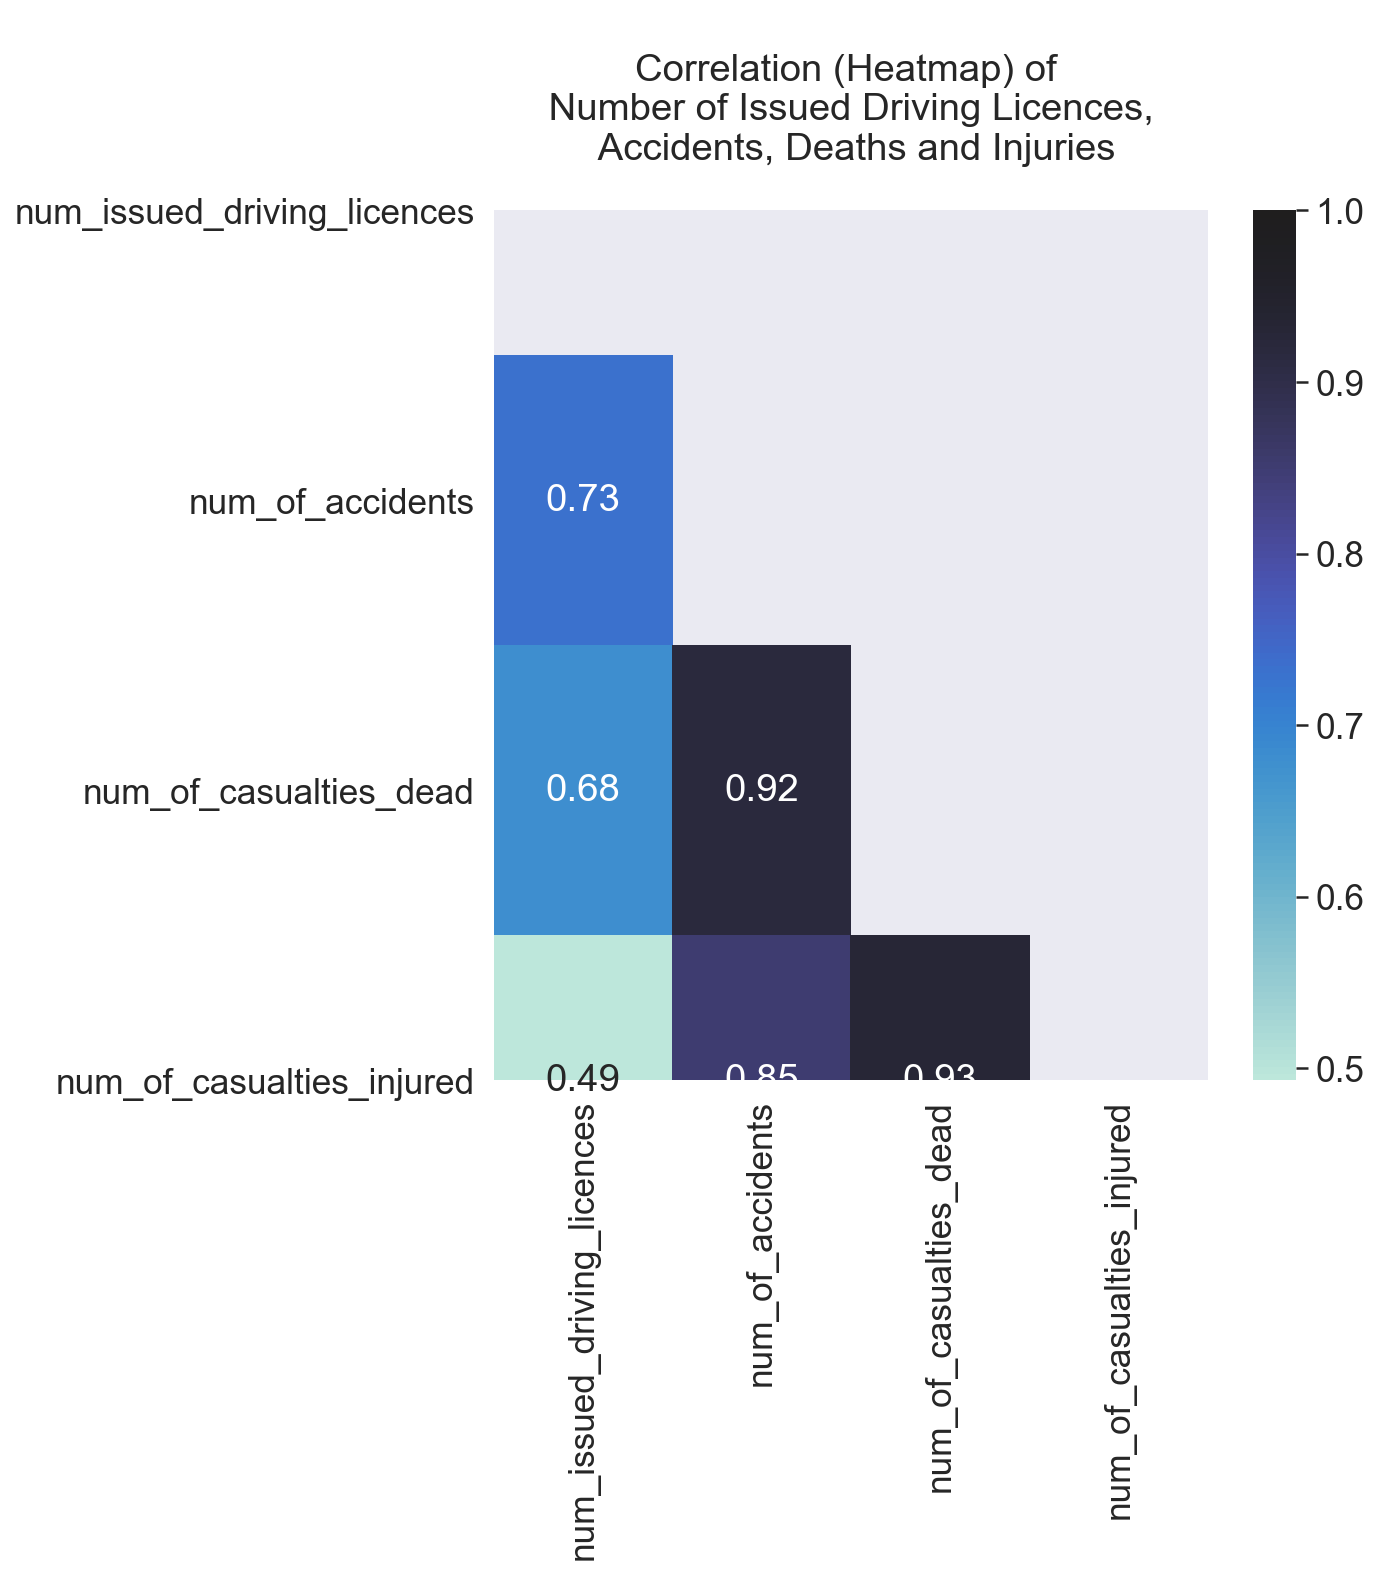

In [149]:
# Ploting heatmap for # of Issued Driving Licences and # of Accidents, Deaths and Injuries (not normilized)

f, ax = plt.subplots(figsize=(8, 8),)

mask = np.zeros_like(combined_licen_acced.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(combined_licen_acced.corr(),center=True,annot=True,ax=ax,fmt='.2g',linewidths=0,mask=mask)


sns.set(font_scale=1.6)
ax.set_title('\nCorrelation (Heatmap) of \n Number of Issued Driving Licences, \n Accidents, Deaths and Injuries\n')
plt.savefig("../output_charts/Correlation of Number of Issued Driving Licences, Accidents, Deaths and Injuries.png",bbox_inches='tight')

plt.show()



In [150]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig , ax = plt.subplots(nrows=nrows, ncols=2) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot

#### Plot and interpret histograms 
For each of the following:
- Driving Licenses number
- Traffic Accidents number

Please plot two additional histograms that will help with your understanding of the data

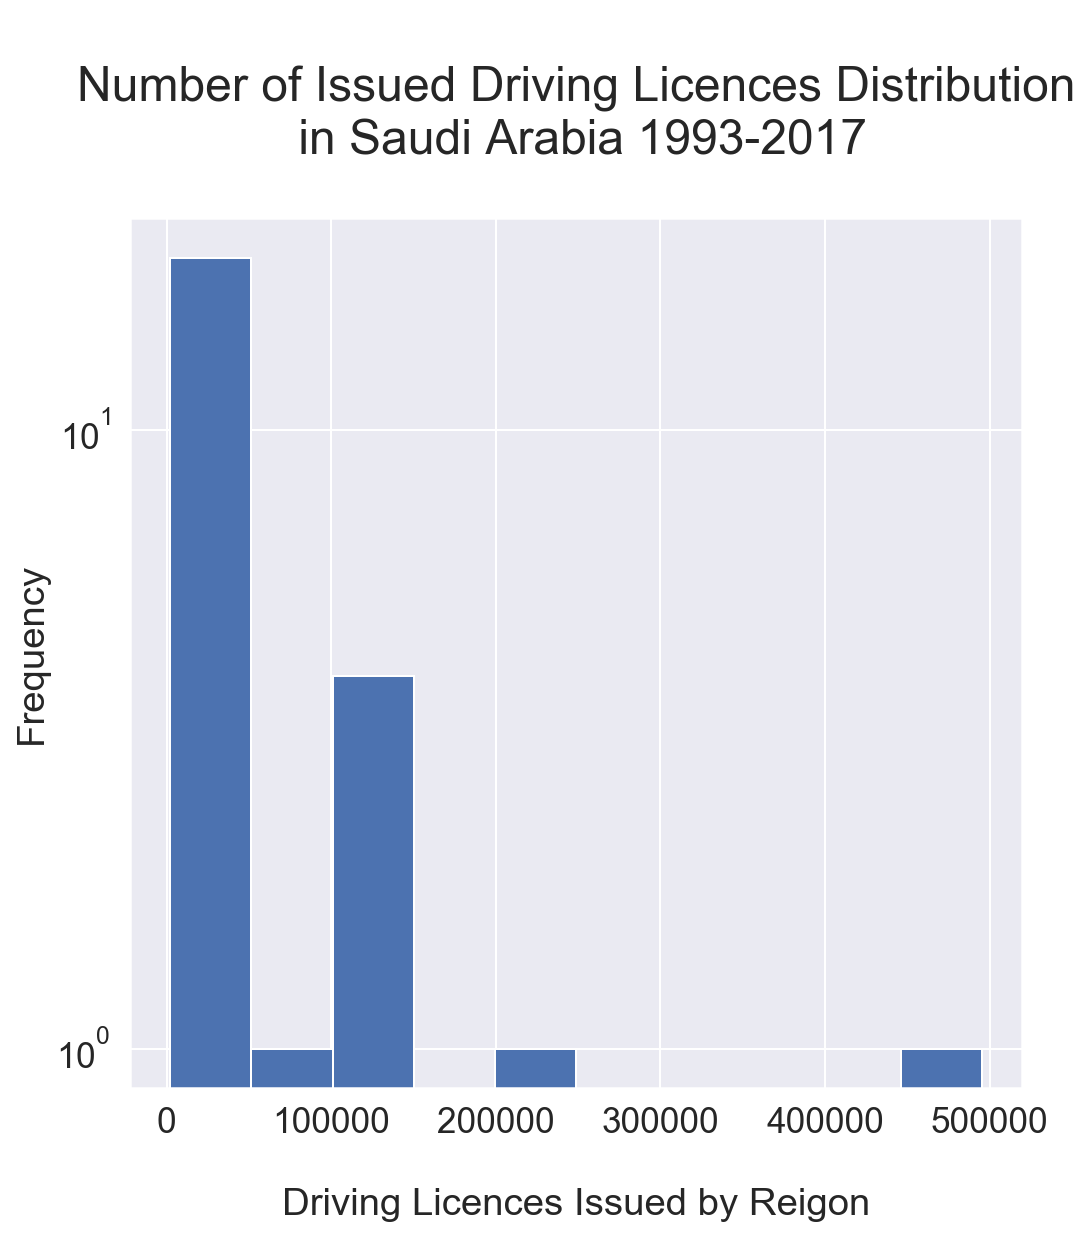

In [151]:
# Plotting the distribution of the number of Issued Driving Licences between 1993 to 2017

f, ax = plt.subplots(figsize=(8, 8))
combined_all.num_issued_driving_licences.plot(kind='hist', bins=10, logy=True)
sns.set(font_scale=2)
ax.set_title('\nNumber of Issued Driving Licences Distribution\n in Saudi Arabia 1993-2017\n')
plt.xlabel('\nDriving Licences Issued by Reigon')

plt.savefig("../output_charts/Number of Issued Driving Licences Distribution in Saudi Arabia 1993-2017.png",bbox_inches='tight')


plt.show()

## " Skewed to the right distribution, could be due to administration areas` bias in population size "

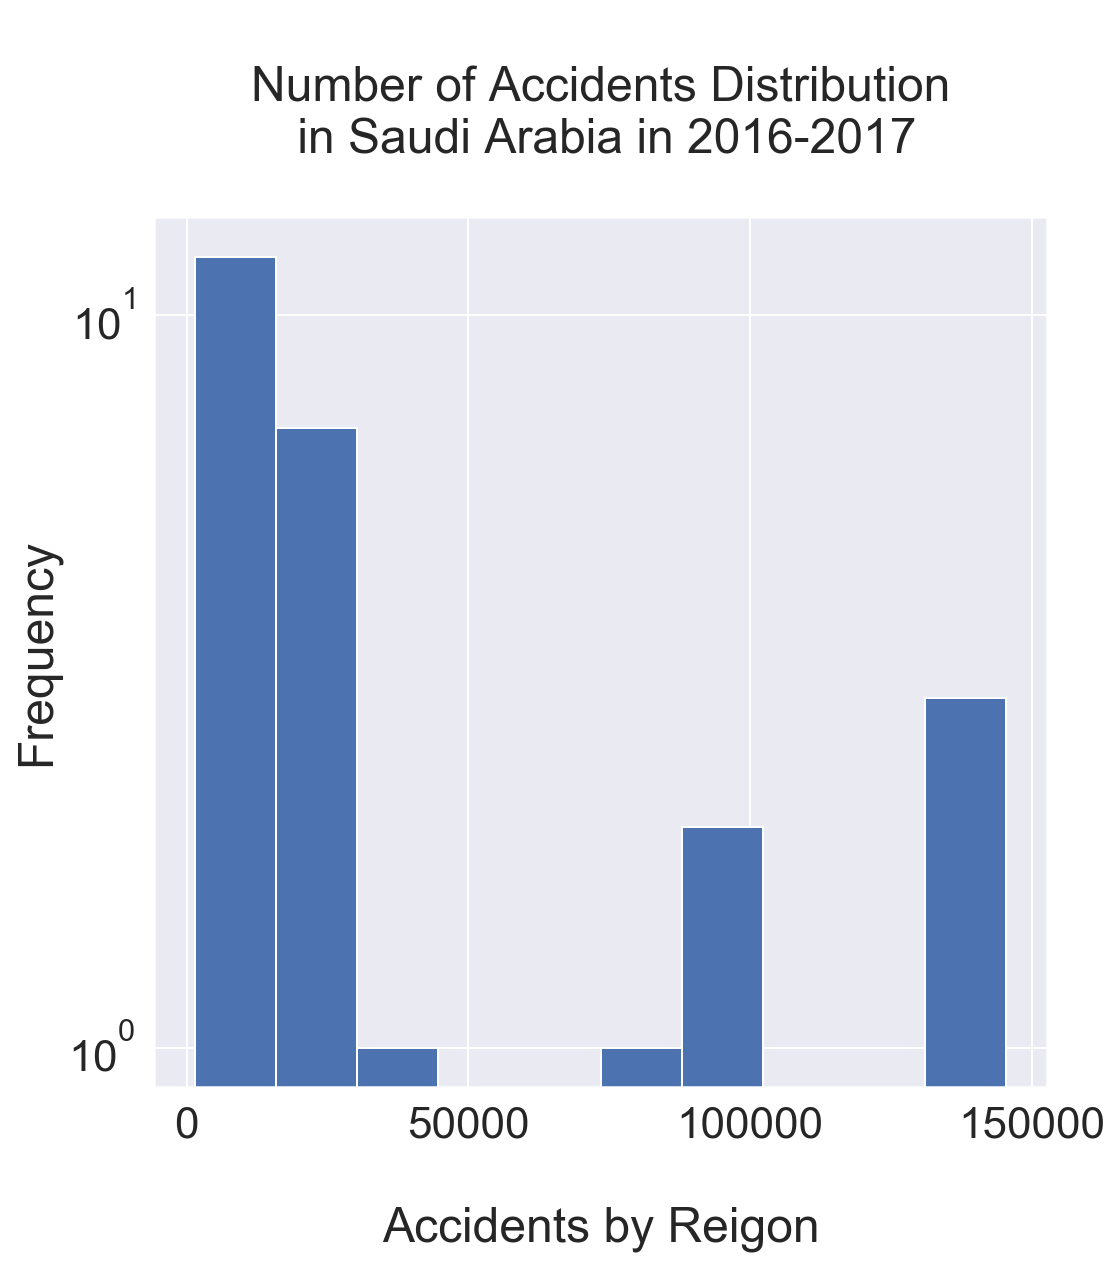

In [62]:
# Plotting the distribution of the number accidents in 2016 and 2017

f, ax = plt.subplots(figsize=(8, 8))
combined_all.num_of_accidents.plot(kind='hist', bins=10, logy=True)
sns.set(font_scale=2)
ax.set_title('\nNumber of Accidents Distribution\n in Saudi Arabia in 2016-2017\n')
plt.xlabel('\nAccidents by Reigon')
plt.savefig("../output_charts/Number of Accidents Distribution in Saudi Arabia in 2016-2017.png",bbox_inches='tight')


plt.show()

## " Multimodal distribution "

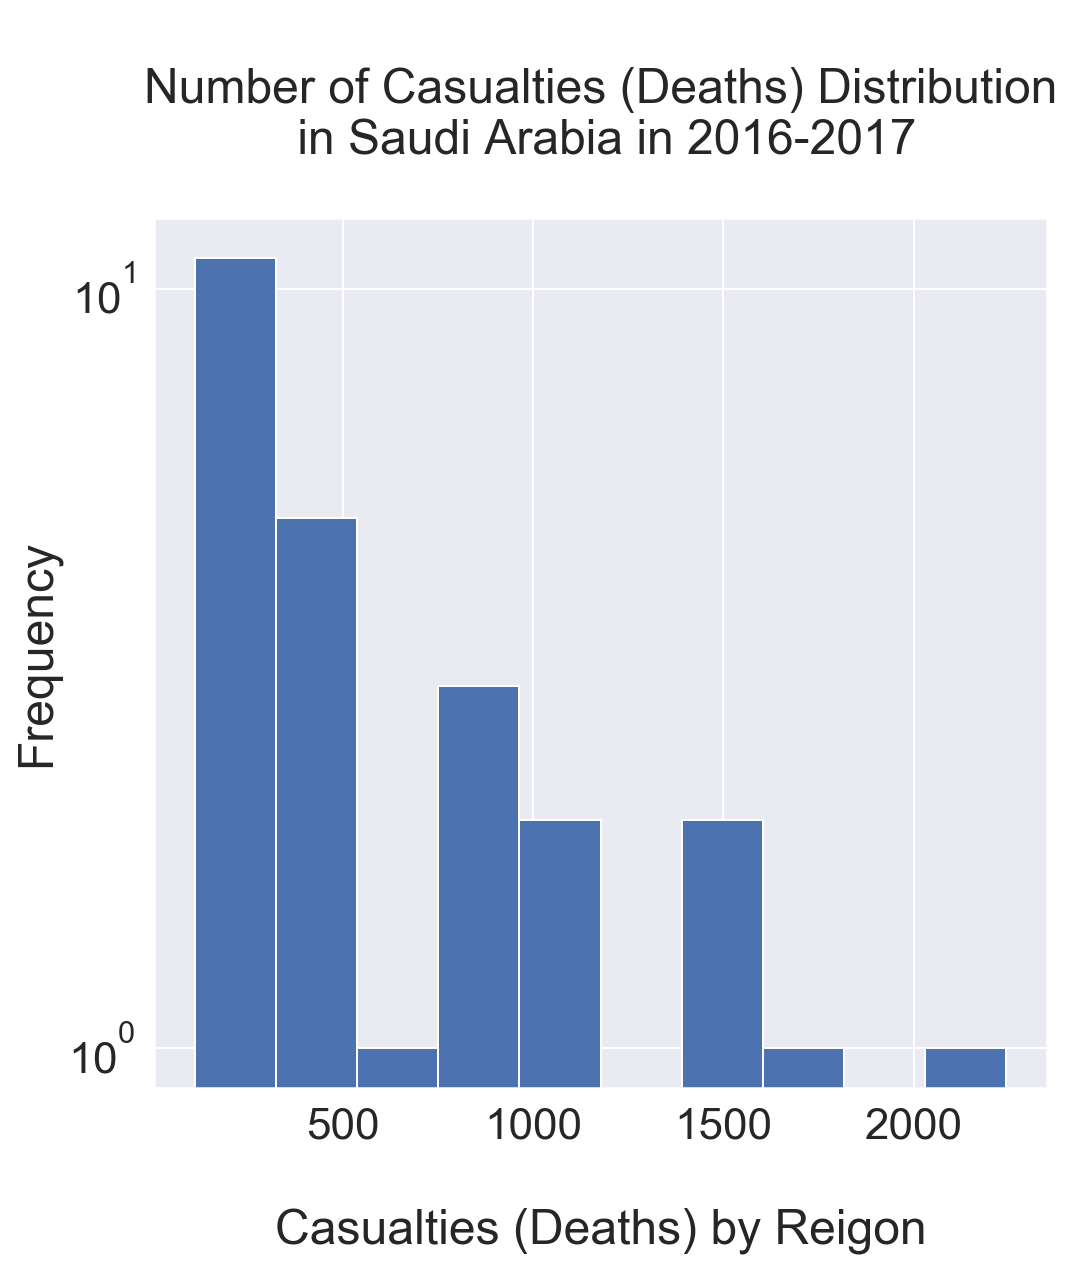

In [63]:
# Plotting the distribution of the number casualties (Death) in 2016 and 2017

f, ax = plt.subplots(figsize=(8, 8))
combined_all.num_of_casualties_dead.plot(kind='hist', bins=10, logy=True)
sns.set(font_scale=2)
ax.set_title('\nNumber of Casualties (Deaths) Distribution\n in Saudi Arabia in 2016-2017\n')
plt.xlabel('\nCasualties (Deaths) by Reigon')
plt.savefig("../output_charts/Number of Casualties (Deaths) Distribution in Saudi Arabia in 2016-2017.png",bbox_inches='tight')


plt.show()


## " Multimodal distribution "

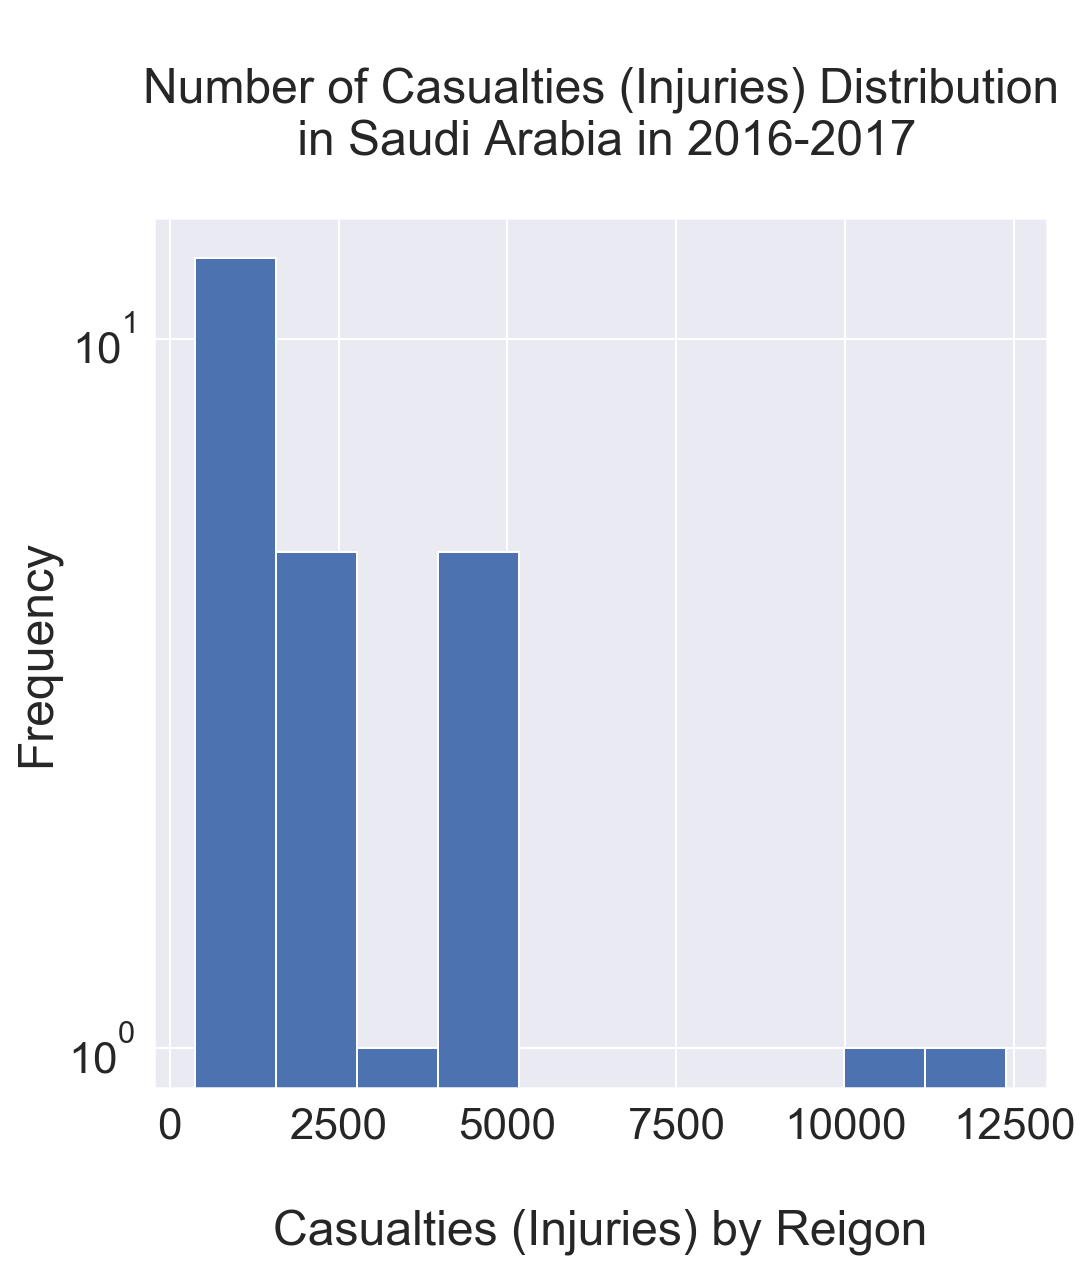

In [64]:
# Plotting the distribution of the number casualties (Injuries) in 2016 and 2017

f, ax = plt.subplots(figsize=(8, 8))
combined_all.num_of_casualties_injured.plot(kind='hist', bins=10, logy=True)
sns.set(font_scale=2)
ax.set_title('\nNumber of Casualties (Injuries) Distribution\n in Saudi Arabia in 2016-2017\n')
plt.xlabel('\nCasualties (Injuries) by Reigon')
plt.savefig("../output_charts/Number of Casualties (Injuries) Distribution in Saudi Arabia in 2016-2017.png",bbox_inches='tight')


plt.show()

#### Plot and interpret scatter plots

For each of the following:
- Driving Licenses vs. Traffic Accidents for 2017
- Driving Licenses vs. Traffic Accidents for 2016
- Driving Licenses for 2016 vs 2017
- Traffic Accidents for 2016 vs 2017

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


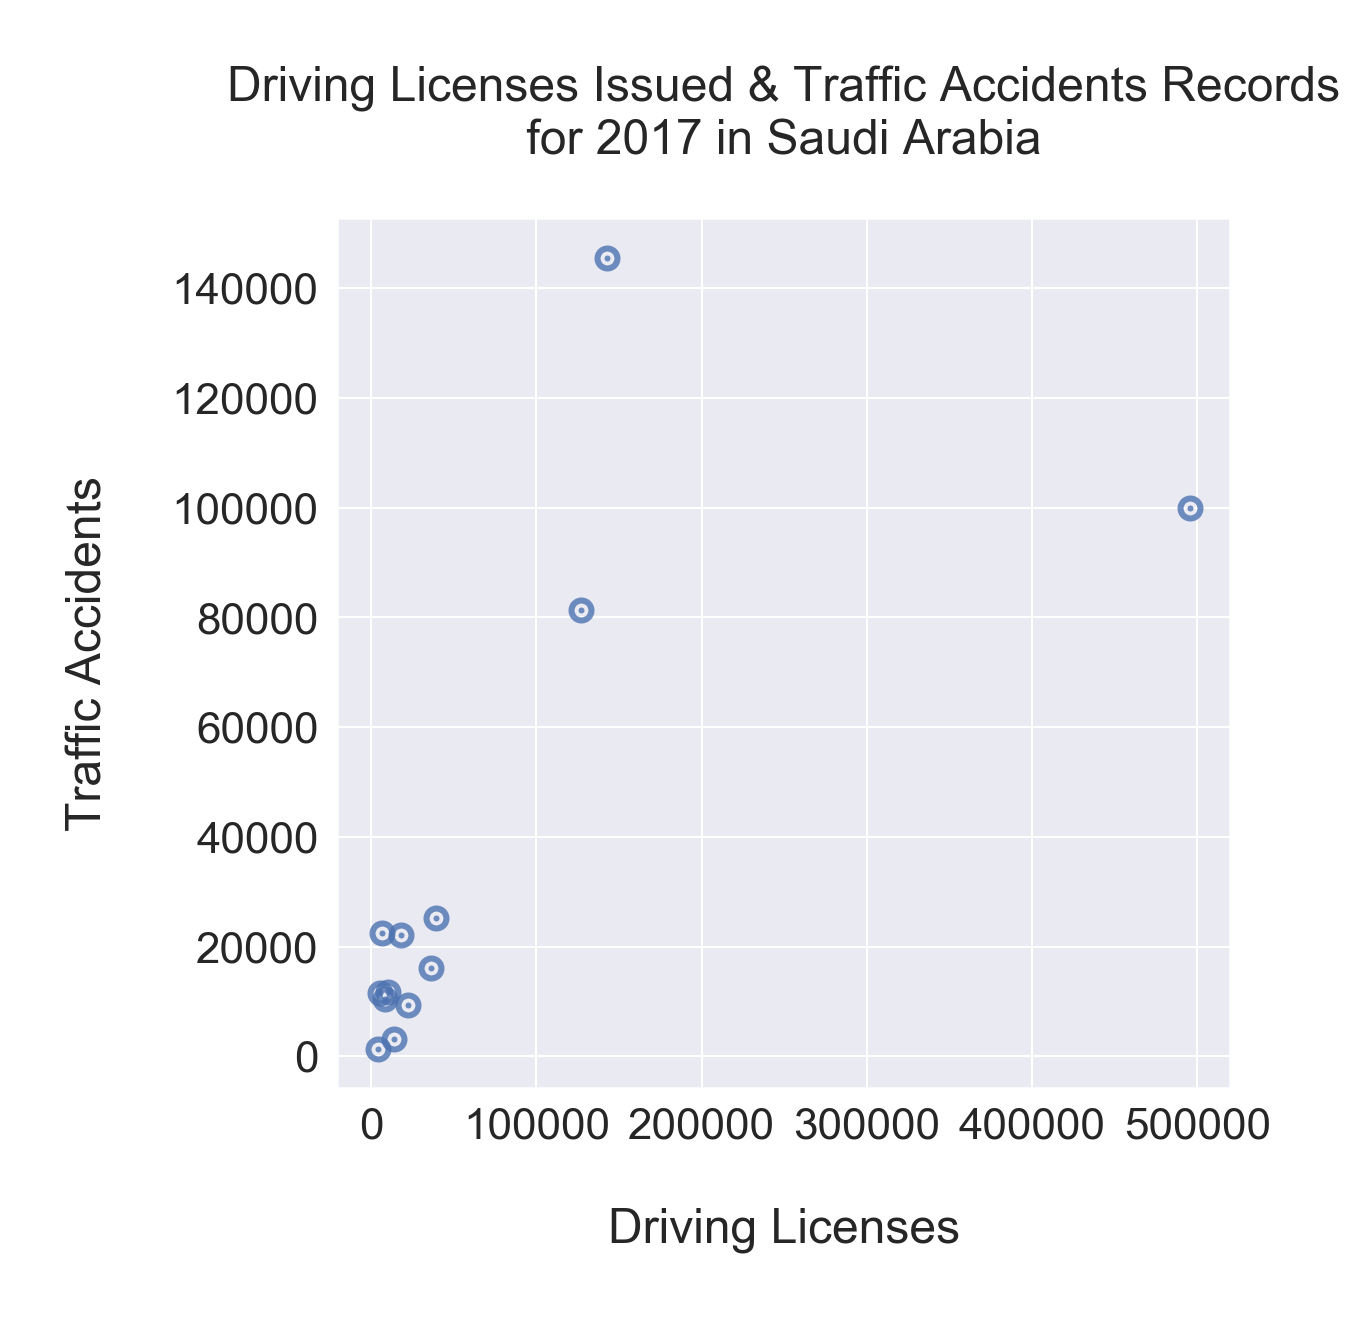

In [65]:
# Filtring dataframe for 2016 and 2017
filter_2017 = combined_all[combined_all['year']=='01-01-2017']
filter_2016 = combined_all[combined_all['year']=='01-01-2016']


# Plotting the relation between Driving Licenses & Traffic Accidents for 2017 and 2016
dv_2017 = filter_2017['num_issued_driving_licences']
ta_2017 = filter_2017['num_of_accidents']

dv_2016 = filter_2016['num_issued_driving_licences']
ta_2016 = filter_2016['num_of_accidents']

f, ax = plt.subplots(figsize=(8, 8))
plt.scatter(dv_2017,ta_2017,linewidths=10, alpha=0.8, marker='.')
sns.set(font_scale=2)
ax.set_title('\nDriving Licenses Issued & Traffic Accidents Records\n for 2017 in Saudi Arabia \n')
plt.xlabel('\nDriving Licenses\n')
plt.ylabel('\nTraffic Accidents\n')
plt.savefig("../output_charts/Driving Licenses Issued & Traffic Accidents Records for 2017 in Saudi Arabia.png",bbox_inches='tight')


plt.show()

## " Positive correlation, outliers could be due to population bias, mainly Riyadh area (far right)"

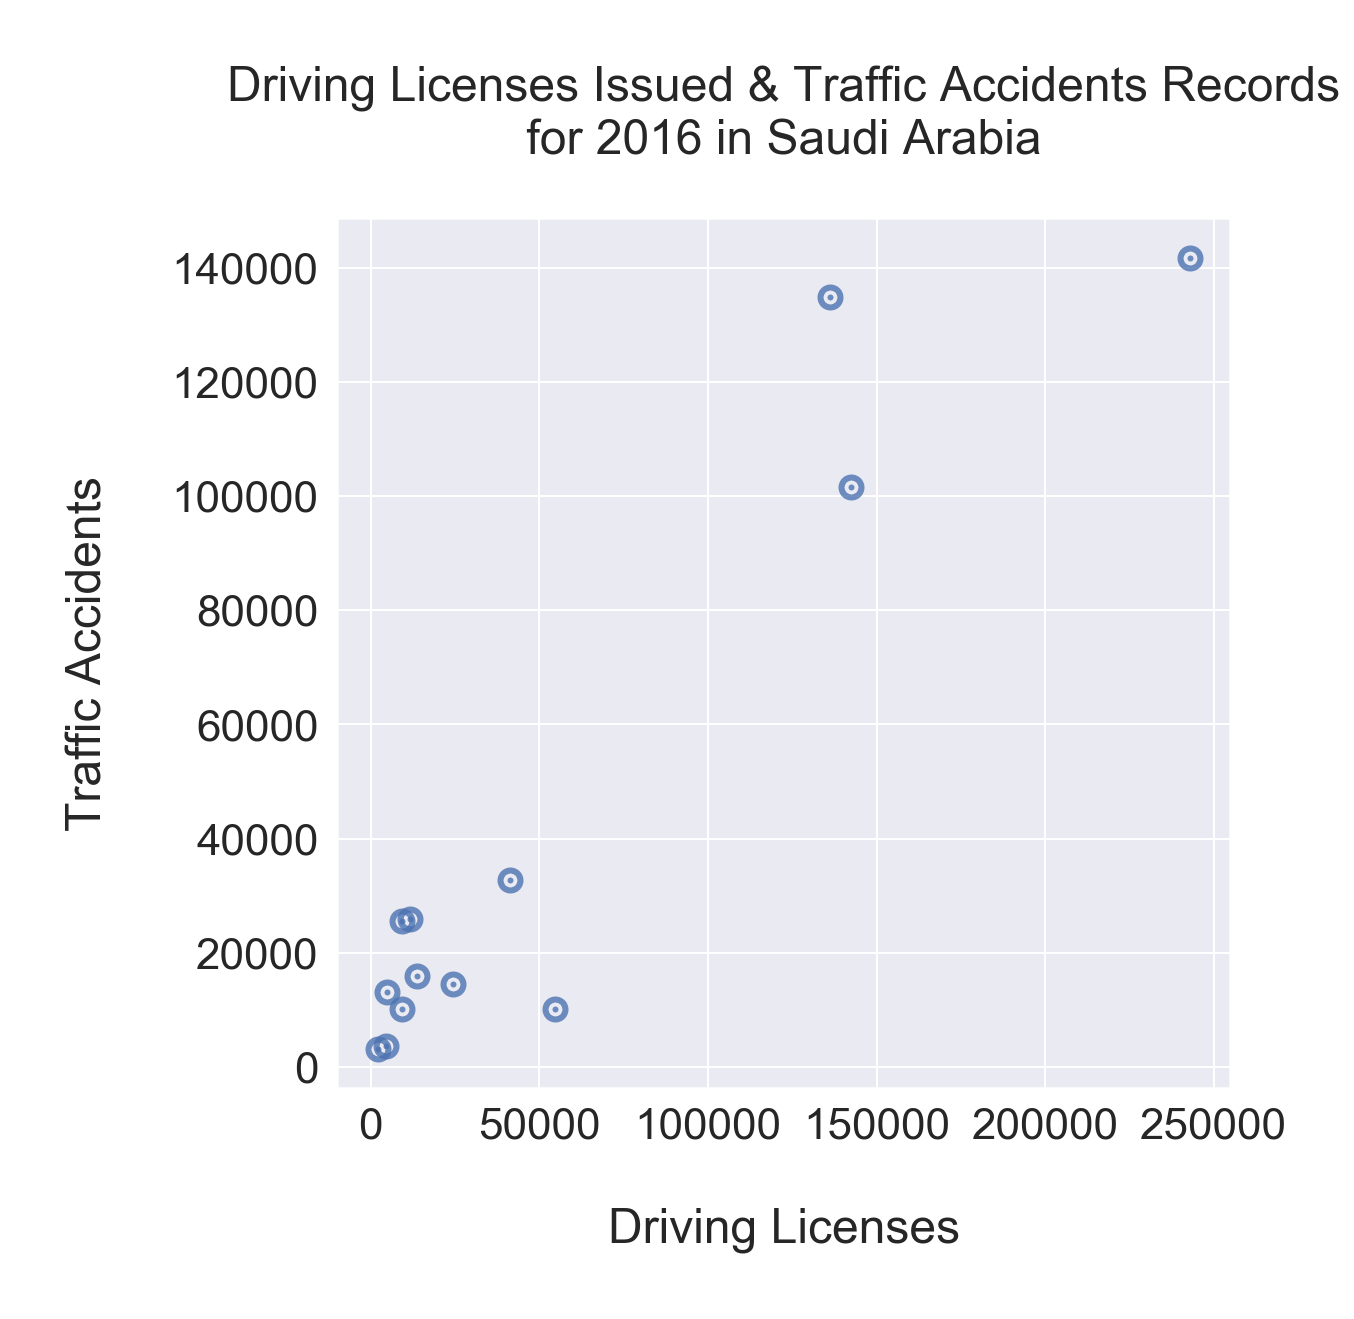

In [66]:
# Plotting the relation between Driving Licenses & Traffic Accidents for 2016

f, ax = plt.subplots(figsize=(8, 8))
#sns.regplot(dv_2016,ta_2016)
plt.scatter(dv_2016,ta_2016,linewidths=10, alpha=0.8, marker='.')
sns.set(font_scale=2)
ax.set_title('\nDriving Licenses Issued & Traffic Accidents Records\n for 2016 in Saudi Arabia \n')
plt.xlabel('\nDriving Licenses\n')
plt.ylabel('\nTraffic Accidents\n')
plt.savefig("../output_charts/Driving Licenses Issued & Traffic Accidents Records for 2016 in Saudi Arabia.png",bbox_inches='tight')


plt.show()

## " Positive correlation "

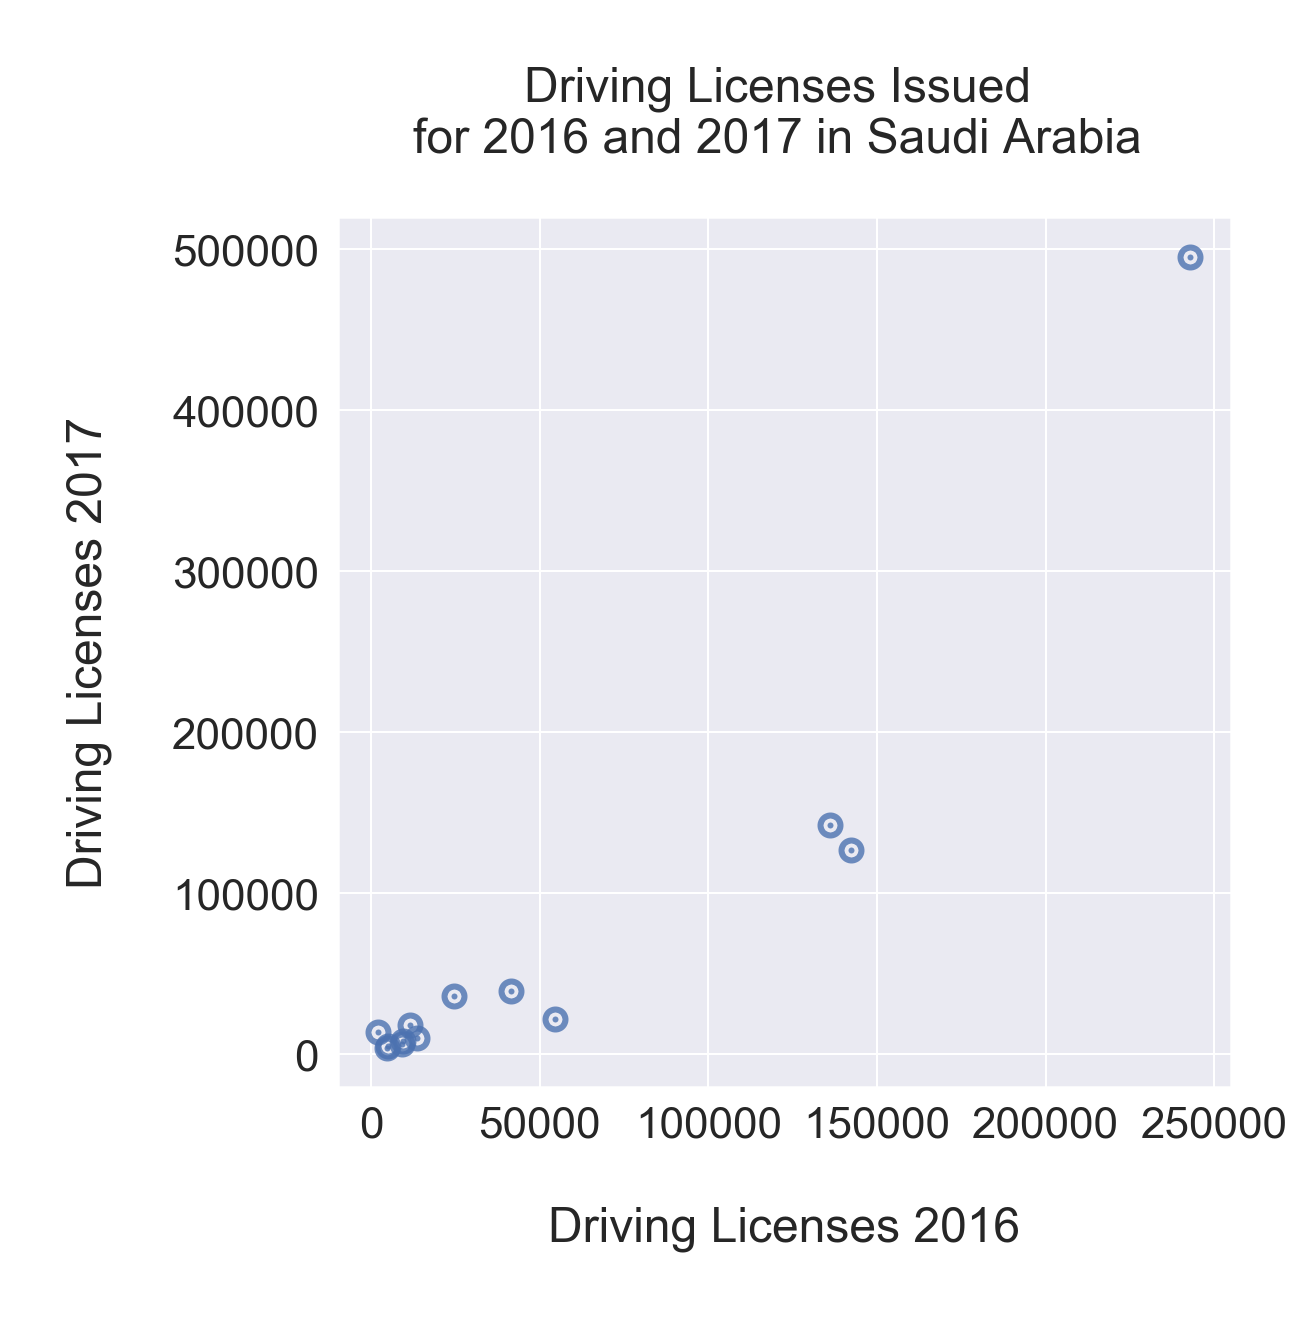

In [67]:
# Plotting the relation between Driving Licenses for 2016 vs 2017 

f, ax = plt.subplots(figsize=(8, 8))
plt.scatter(dv_2016,dv_2017,linewidths=10, alpha=0.8, marker='.')
sns.set(font_scale=2)
ax.set_title('\nDriving Licenses Issued \nfor 2016 and 2017 in Saudi Arabia \n')
plt.xlabel('\nDriving Licenses 2016\n')
plt.ylabel('\nDriving Licenses 2017\n')
plt.savefig("../output_charts/Driving Licenses Issued for 2016 and 2017 in Saudi Arabia.png",bbox_inches='tight')


plt.show()

## " Positive correlation "

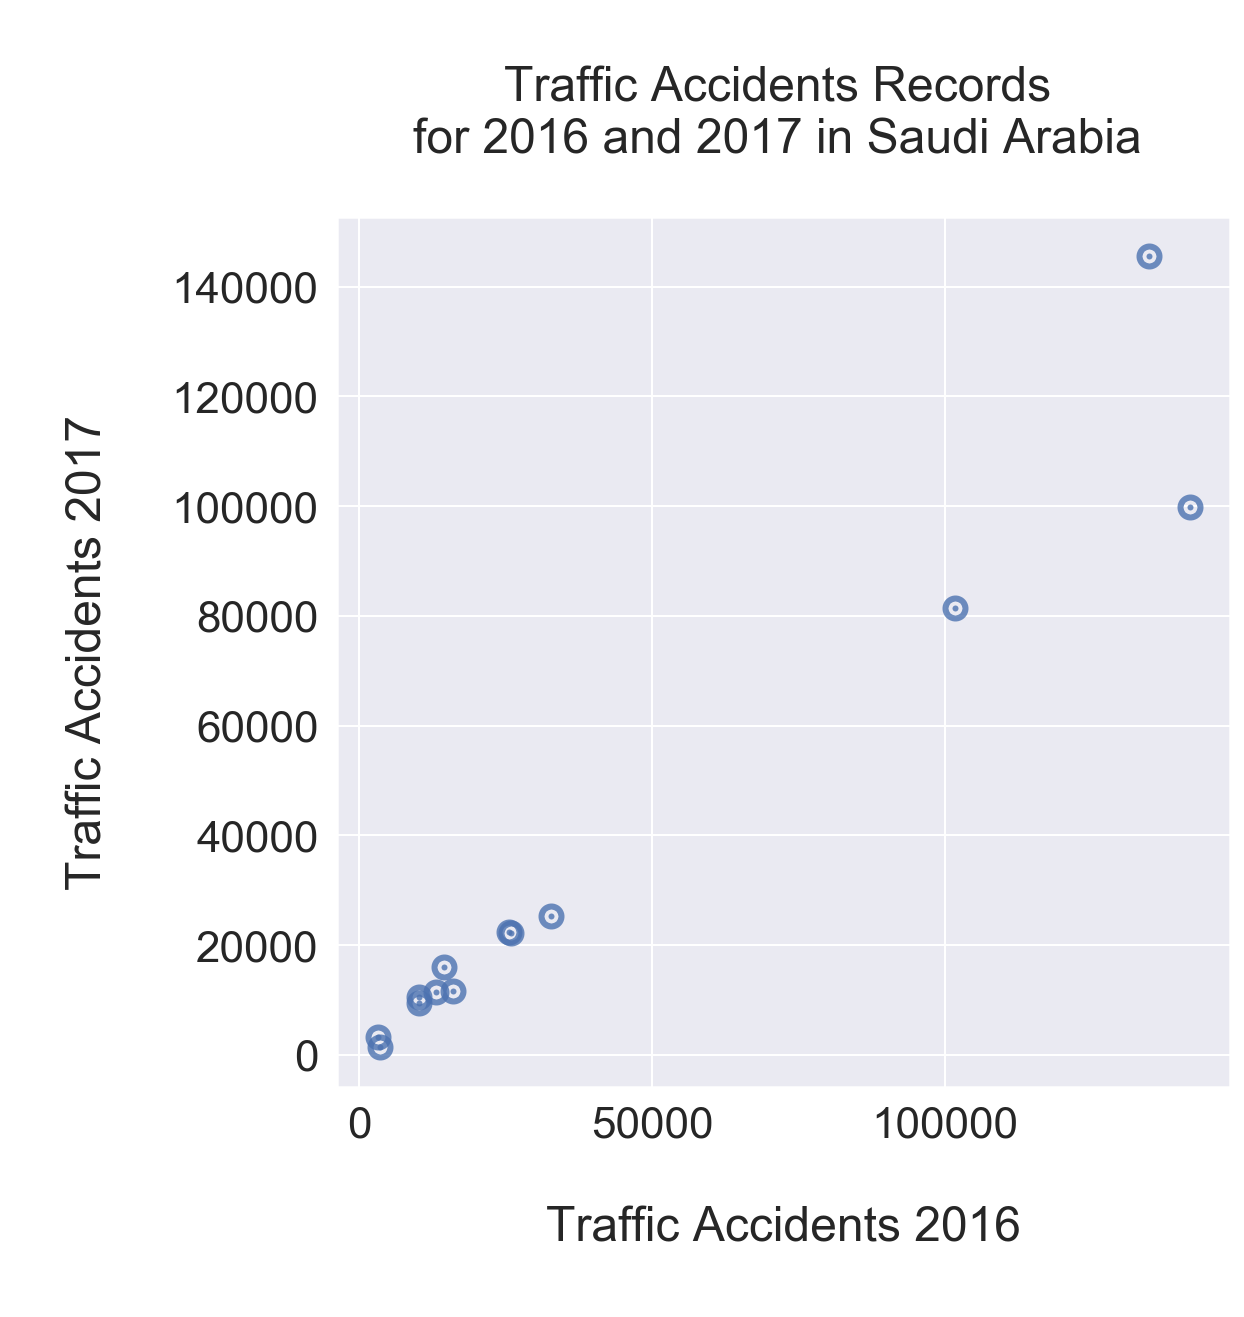

In [68]:
# Plotting the relation between Traffic Accidents for 2016 vs 2017 

f, ax = plt.subplots(figsize=(8, 8))
plt.scatter(ta_2016,ta_2017,linewidths=10, alpha=0.8, marker='.')
sns.set(font_scale=2)
ax.set_title('\nTraffic Accidents Records \nfor 2016 and 2017 in Saudi Arabia \n')
plt.xlabel('\nTraffic Accidents 2016\n')
plt.ylabel('\nTraffic Accidents 2017\n')
plt.savefig("../output_charts/Traffic Accidents Records for 2016 and 2017 in Saudi Arabia.png",bbox_inches='tight')


plt.show()

## " Positive correlation "

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [69]:
# filtering to numrical only dataframe and dividing to properly plot boxplots

filter_numric_only_1 = combined_all[['administrative_area','num_issued_driving_licences','num_of_accidents']]
filter_numric_only_2 = combined_all[['administrative_area','num_of_casualties_dead','num_of_casualties_injured']]


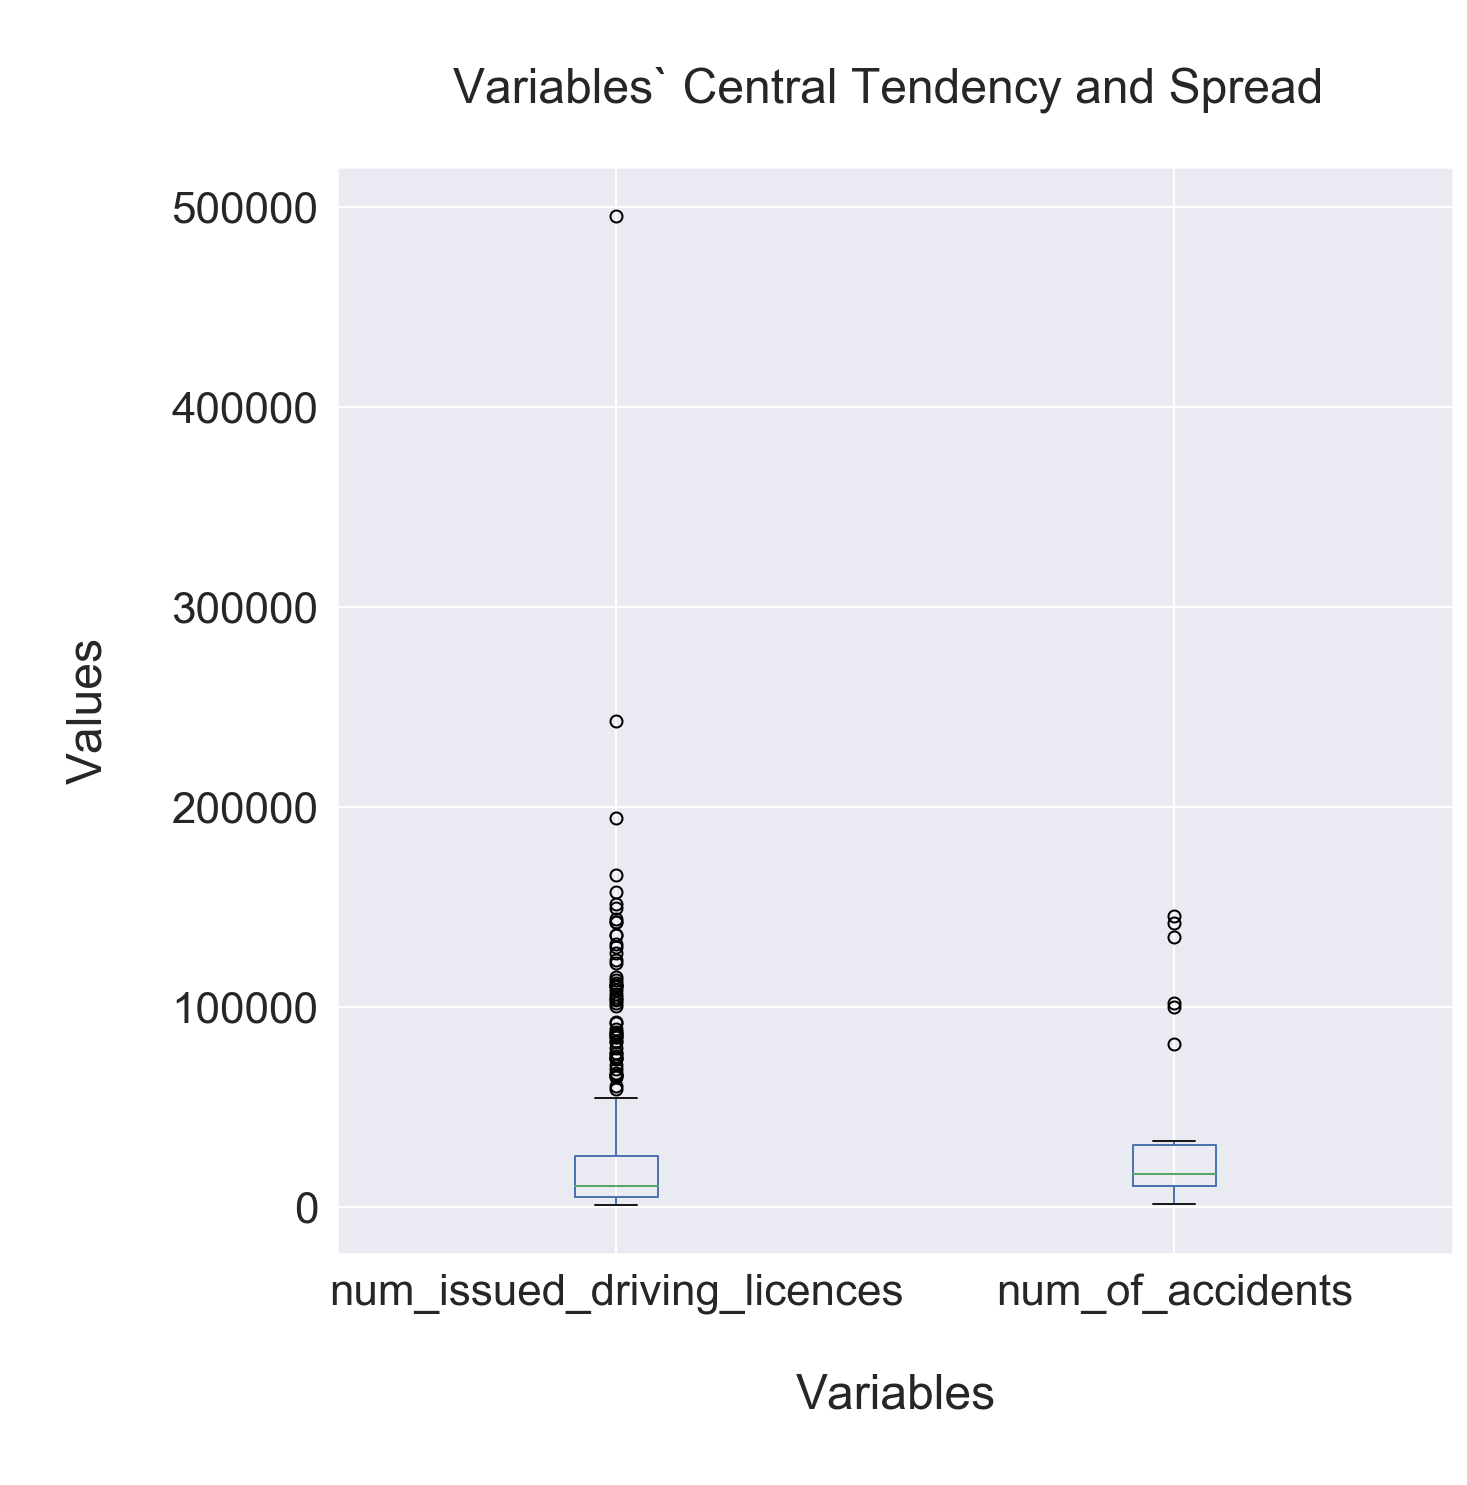

In [70]:
# ploting Variables` Central Tendency and Spread set1

f, ax = plt.subplots(figsize=(10, 10))
filter_numric_only_1.plot(kind='box',ax=ax,logy=False)
sns.set(font_scale=2)
ax.set_title('\nVariables` Central Tendency and Spread \n')
plt.xlabel('\nVariables\n')
plt.ylabel('\nValues\n')
plt.savefig("../output_charts/Variables` Central Tendency and Spread - set1.png",bbox_inches='tight')


plt.show()

## " Number of driving licences issued by adminstrative area from 1993 to 2017 has many outliers (with a median arround 10.3k), while number of accidents  in 2016 to 2017 has also some outliers (with a median arround 16.1k)"

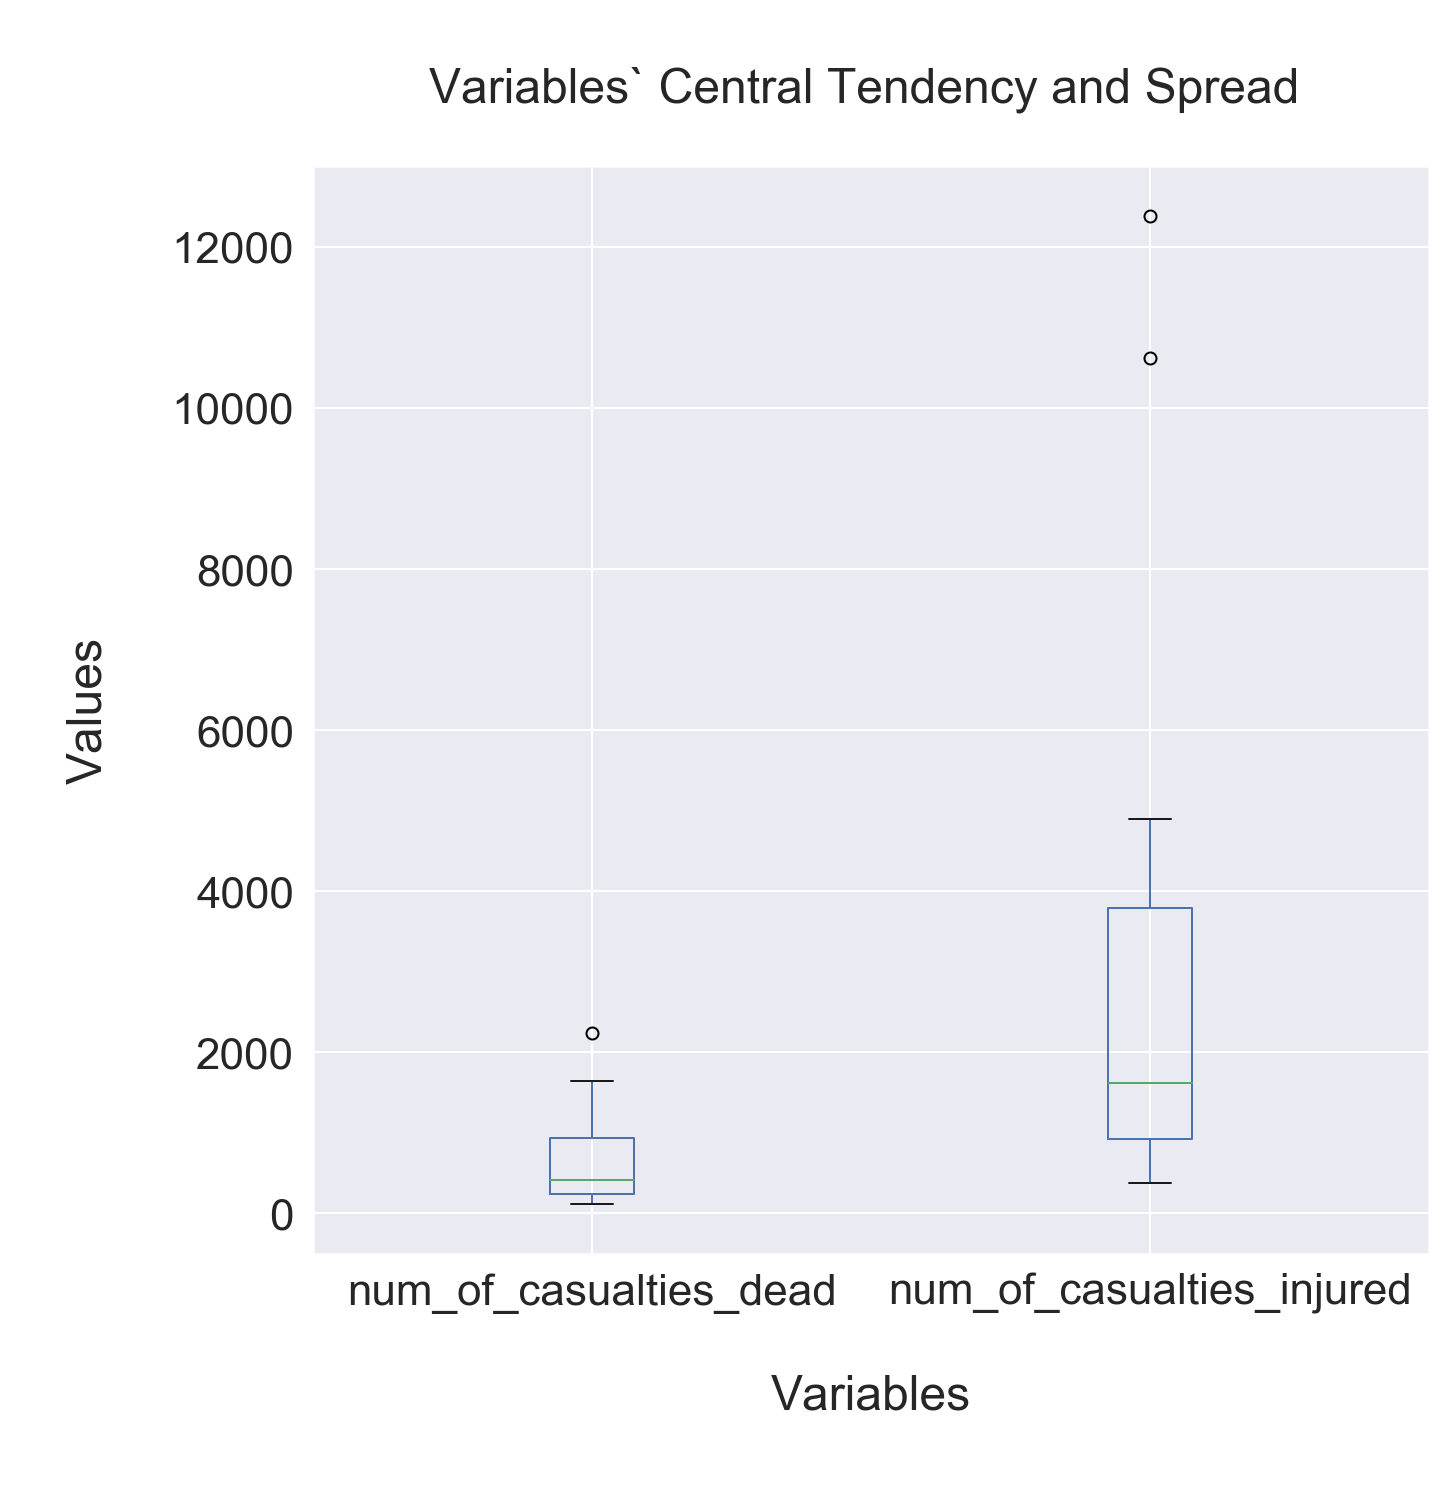

In [71]:
# ploting Variables` Central Tendency and Spread set2

f, ax = plt.subplots(figsize=(10, 10))
filter_numric_only_2.plot(kind='box',ax=ax)
sns.set(font_scale=2)
ax.set_title('\nVariables` Central Tendency and Spread \n')
plt.xlabel('\nVariables\n')
plt.ylabel('\nValues\n')
plt.savefig("../output_charts/Variables` Central Tendency and Spread - set2.png",bbox_inches='tight')


plt.show()

## " Number of casualties (deaths) by adminstrative area from 2016 to 2017 has one outlier (with a median arround 416), while number of casualties (injured) has two outliers (with a median arround 1619)"

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

## " Yes, normalizing number of licences issued, accidents and casualties by administrative areas` population. Normalizing provide a way for us to compare areas and investigate if there is a trend in some areas. "

In [72]:
# filtering for 2016 and 2017 data only
combined_all_2016_7_only = combined_all.dropna()

# find how many licences issued per 10,000 people in each adminstrative area (based on the average of 2016 and 2017 licences issuance)
number_of_licen_issued_per_10k_pop_2016 = (combined_all_2016_7_only.groupby(['administrative_area'])['num_issued_driving_licences'].mean()/combined_all_2016_7_only.groupby(['administrative_area'])['pop_2016'].mean())*10000
number_of_licen_issued_per_10k_pop_2017 = (combined_all_2016_7_only.groupby(['administrative_area'])['num_issued_driving_licences'].mean()/combined_all_2016_7_only.groupby(['administrative_area'])['pop_2017'].mean())*10000

round(number_of_licen_issued_per_10k_pop_2016,0) , round(number_of_licen_issued_per_10k_pop_2017,0), number_of_licen_issued_per_10k_pop_2017.mean()

(administrative_area
 Al-Baha              94.0
 Al-Jouf             175.0
 Al-Qaseem            56.0
 Assir               186.0
 Eastern             281.0
 Hail                559.0
 Jazan                97.0
 Madinah             146.0
 Makkah              167.0
 Najran              140.0
 Northern Boarder    142.0
 Riyadh              461.0
 Tabouk              134.0
 dtype: float64, administrative_area
 Al-Baha              92.0
 Al-Jouf             172.0
 Al-Qaseem            54.0
 Assir               182.0
 Eastern             275.0
 Hail                547.0
 Jazan                95.0
 Madinah             142.0
 Makkah              163.0
 Najran              137.0
 Northern Boarder    140.0
 Riyadh              449.0
 Tabouk              131.0
 dtype: float64, 198.4054497059681)

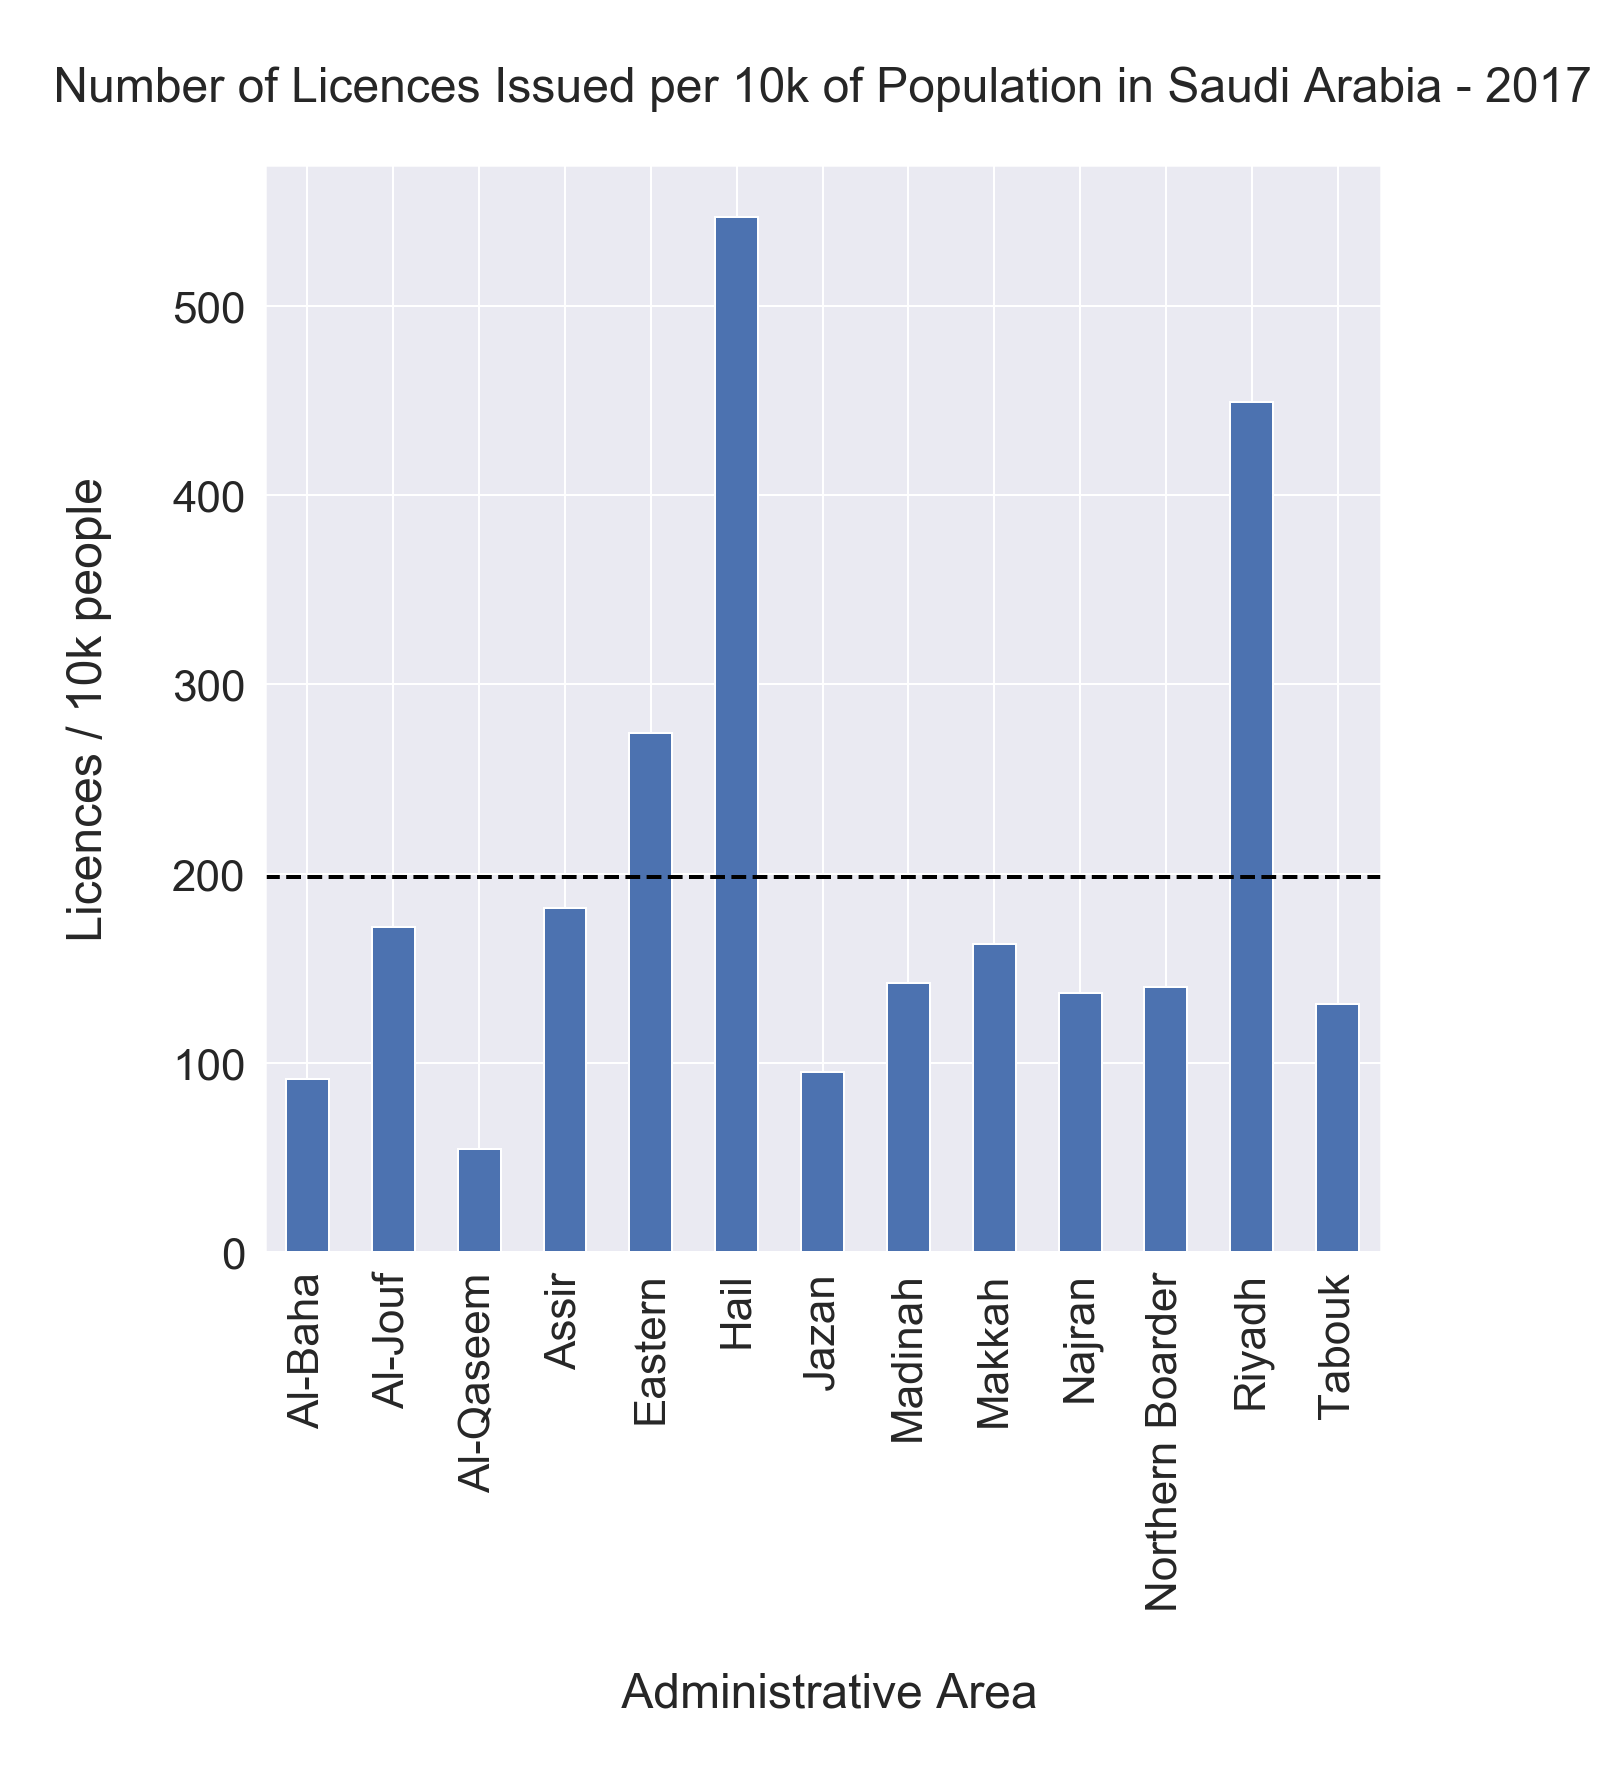

In [73]:
# ploting number of licences issued per 10k of population by administrative area 

f, ax = plt.subplots(figsize=(10, 10))
number_of_licen_issued_per_10k_pop_2017.plot(kind='bar',ax=ax)
sns.set(font_scale=2,)
ax.set_title('\n Number of Licences Issued per 10k of Population in Saudi Arabia - 2017 \n')
plt.xlabel('\n Administrative Area\n')
plt.ylabel('\n Licences / 10k people \n')
ax.axhline(number_of_licen_issued_per_10k_pop_2017.mean(), color='black', linewidth=2, linestyle='dashed') #average line
plt.savefig("../output_charts/Number of Licences Issued per 10k of Population in Saudi Arabia - 2017.png",bbox_inches='tight')


plt.show()

## " It seems Hail and Riyadh have more driving licences issuance on average per 10k people, while average is 198 licences per 10k people " 

In [74]:
# Calculating number of accidents per 10k of population by administrative area

number_of_acced_per_10k_pop_2017 = (combined_all_2016_7_only.groupby(['administrative_area'])['num_of_accidents'].mean()/combined_all_2016_7_only.groupby(['administrative_area'])['pop_2017'].mean())*10000

round(number_of_acced_per_10k_pop_2017,0),number_of_acced_per_10k_pop_2017.mean()

(administrative_area
 Al-Baha              53.0
 Al-Jouf             203.0
 Al-Qaseem           169.0
 Assir               131.0
 Eastern             187.0
 Hail                140.0
 Jazan               153.0
 Madinah              72.0
 Makkah              164.0
 Najran               55.0
 Northern Boarder    339.0
 Riyadh              147.0
 Tabouk              152.0
 dtype: float64, 151.12131196896743)

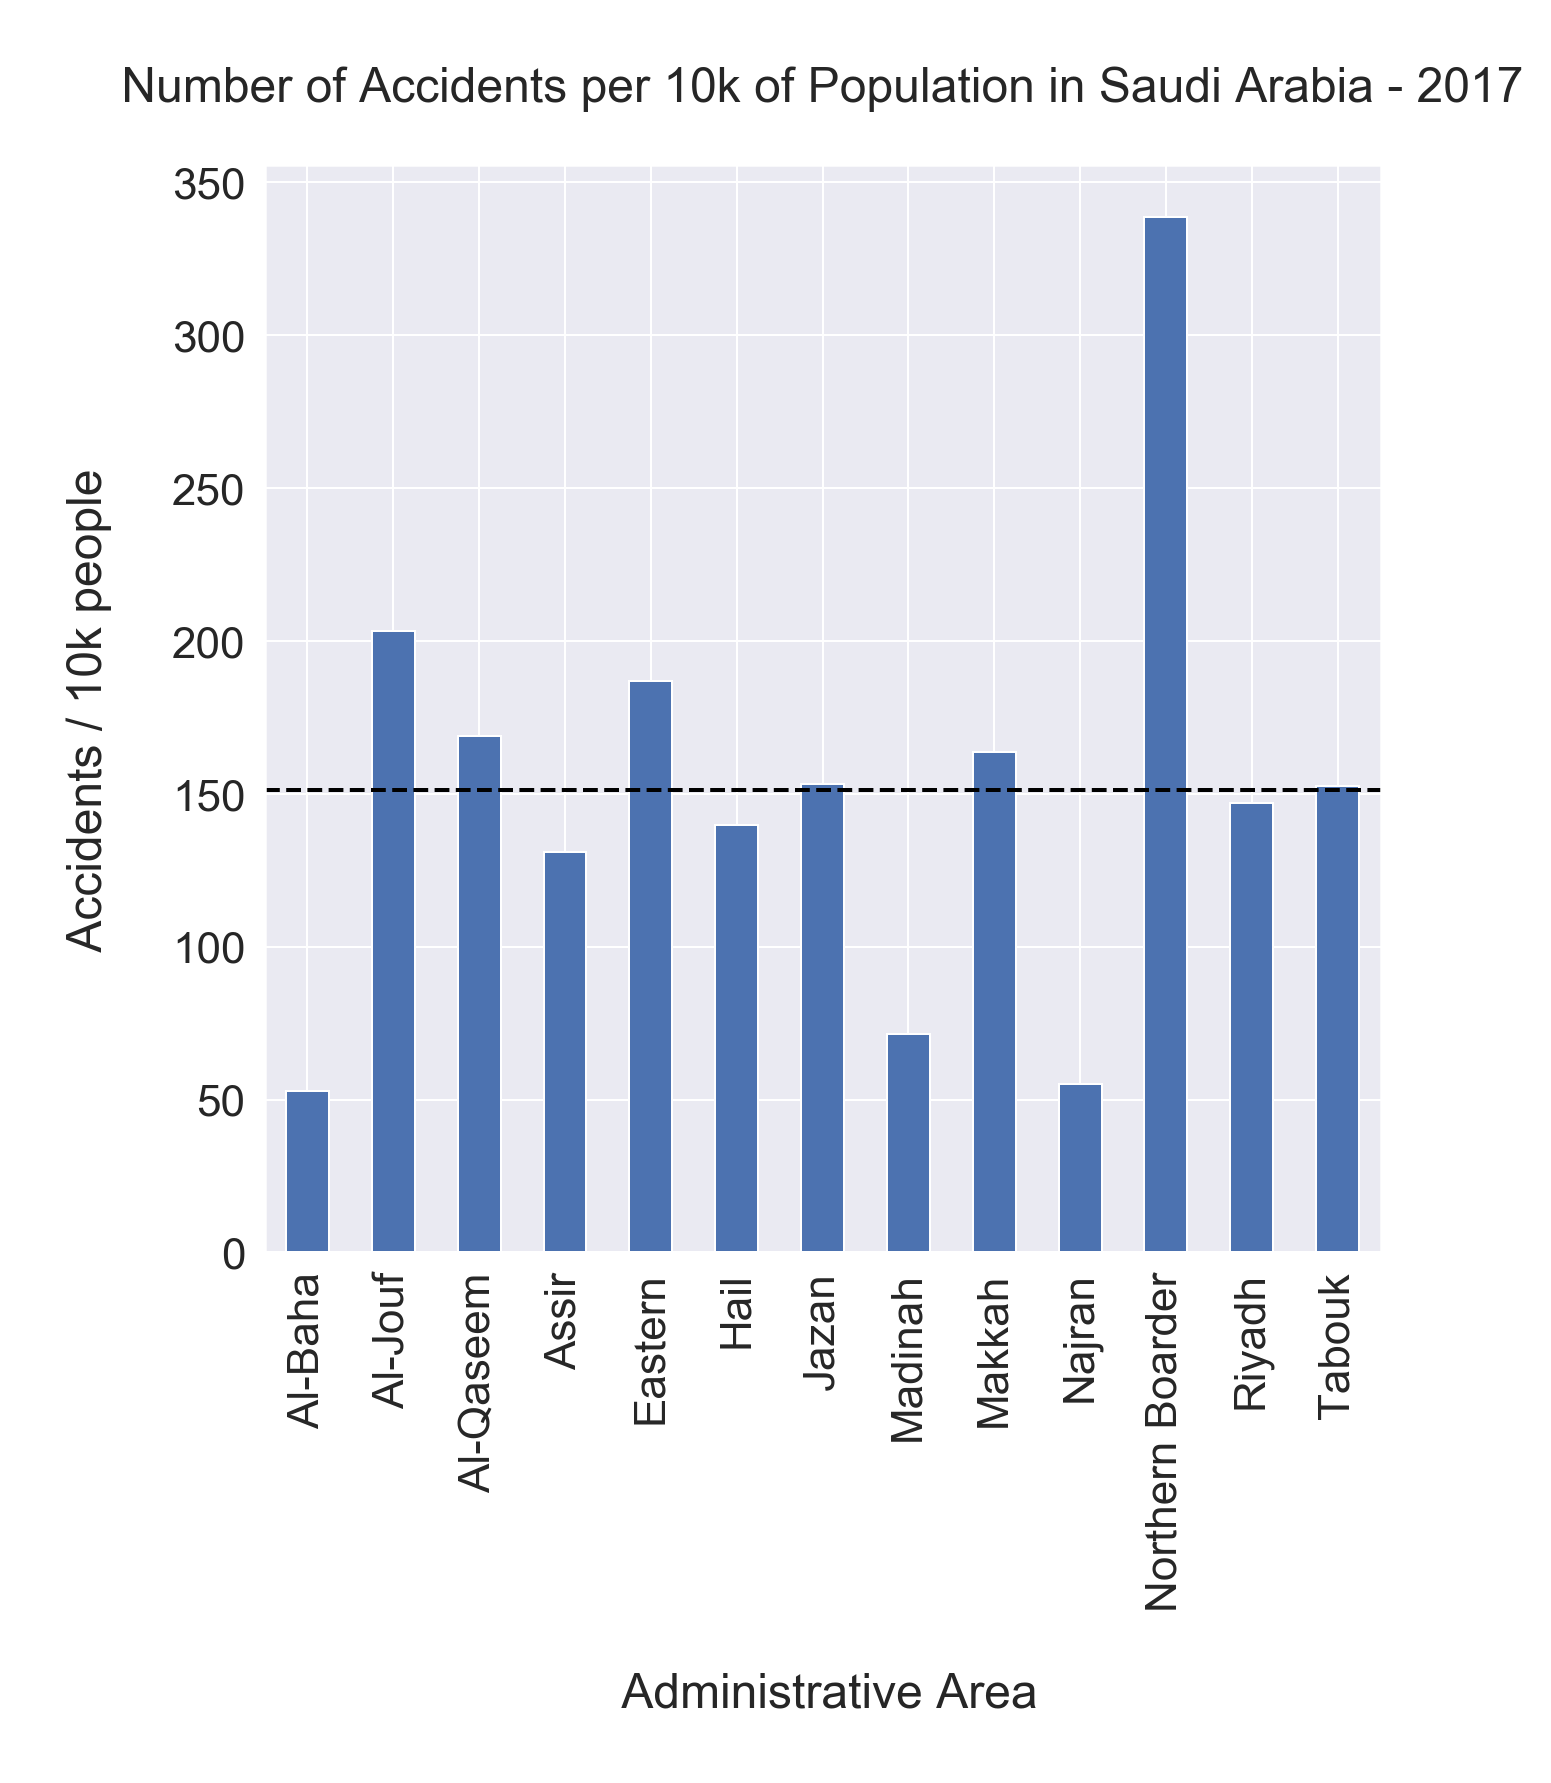

In [75]:
# Ploting number of accidents per 10k of population by administrative area 

f, ax = plt.subplots(figsize=(10, 10))
number_of_acced_per_10k_pop_2017.plot(kind='bar',ax=ax)
sns.set(font_scale=2,)
ax.set_title('\n Number of Accidents per 10k of Population in Saudi Arabia - 2017 \n')
plt.xlabel('\n Administrative Area\n')
plt.ylabel('\n Accidents / 10k people \n')
ax.axhline(number_of_acced_per_10k_pop_2017.mean(), color='black', linewidth=2,linestyle='dashed') #average line
plt.savefig("../output_charts/Number of Accidents per 10k of Population in Saudi Arabia - 2017.png",bbox_inches='tight')


plt.show()



## " It seems that north east of Sadui Arabia is having more accidents on average per 10k people, while average is 151 accidents per 10k people " 

In [76]:
# Calculating number of casualties (deaths) issued per 100k of population by administrative area 

number_of_casu_dead_per_100k_pop_2017 = (combined_all_2016_7_only.groupby(['administrative_area'])['num_of_casualties_dead'].mean()/combined_all_2016_7_only.groupby(['administrative_area'])['pop_2017'].mean())*100000

round(number_of_casu_dead_per_100k_pop_2017,0) , number_of_casu_dead_per_100k_pop_2017.mean()

(administrative_area
 Al-Baha             33.0
 Al-Jouf             48.0
 Al-Qaseem           25.0
 Assir               41.0
 Eastern             21.0
 Hail                40.0
 Jazan               31.0
 Madinah             33.0
 Makkah              23.0
 Najran              32.0
 Northern Boarder    42.0
 Riyadh              17.0
 Tabouk              43.0
 dtype: float64, 33.001679762669575)

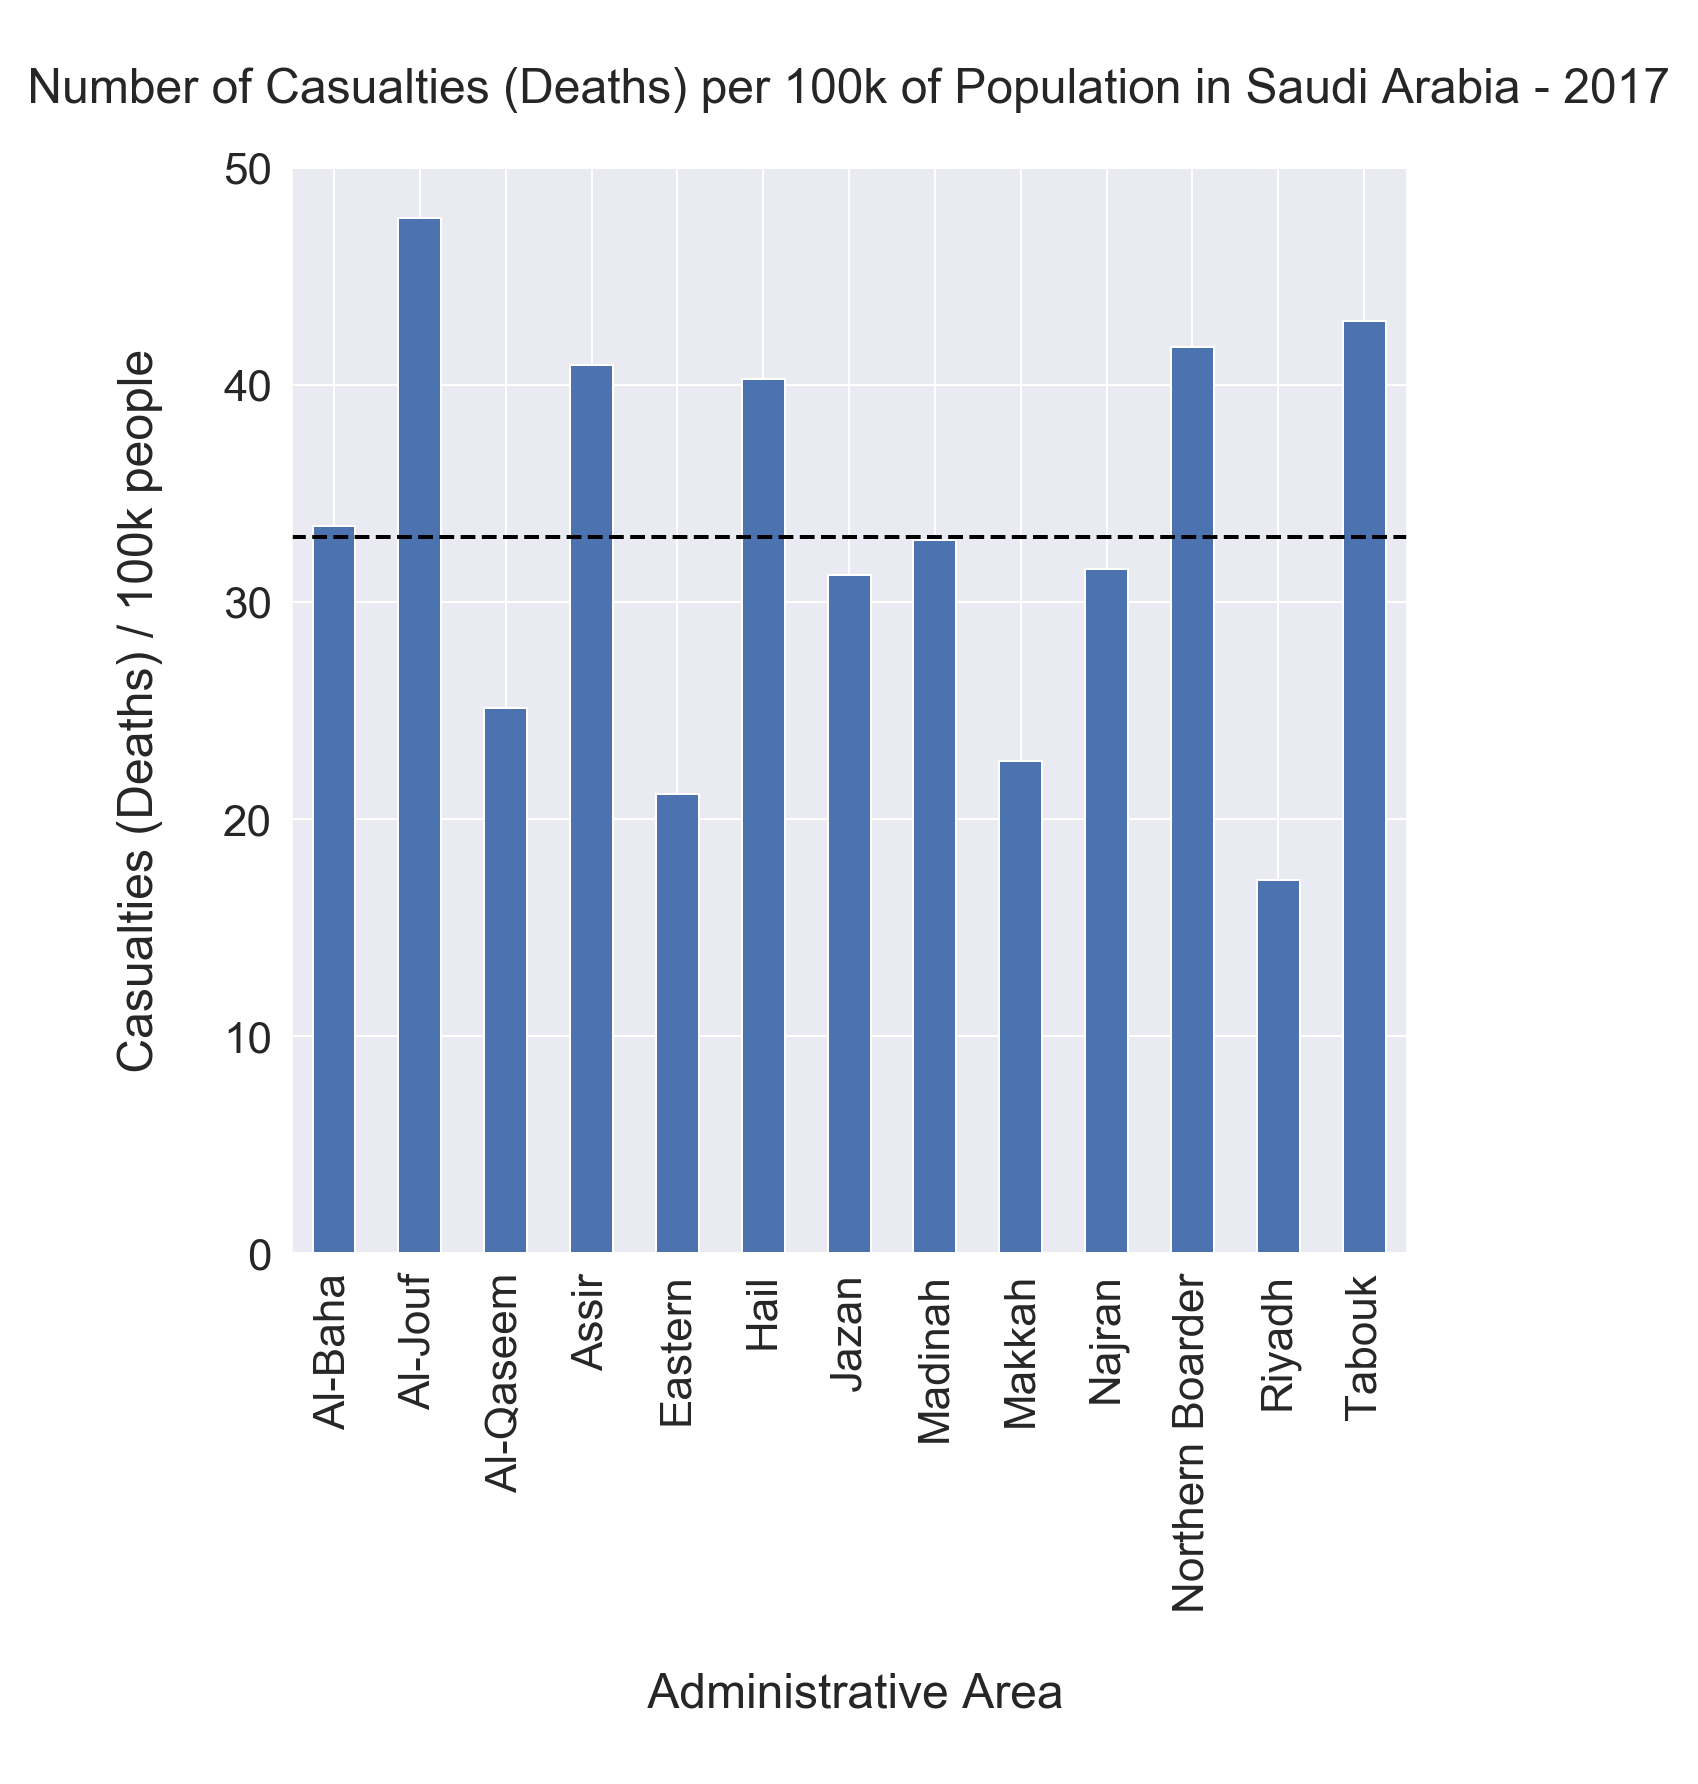

In [77]:
# Ploting number of casualties (deaths) issued per 100k of population by administrative area 

f, ax = plt.subplots(figsize=(10, 10))
number_of_casu_dead_per_100k_pop_2017.plot(kind='bar',ax=ax)
sns.set(font_scale=2,)
ax.set_title('\n Number of Casualties (Deaths) per 100k of Population in Saudi Arabia - 2017 \n')
plt.xlabel('\n Administrative Area\n')
plt.ylabel('\n Casualties (Deaths) / 100k people \n')
ax.axhline(number_of_casu_dead_per_100k_pop_2017.mean(), color='black', linewidth=2,linestyle='dashed') #average line
plt.savefig("../output_charts/Number of Casualties (Deaths) per 100k of Population in Saudi Arabia - 2017.png",bbox_inches='tight')



plt.show()



## " 4 out 6 areas that have more deaths on average are in the northern part of Saudi Arabia, average is 33 deaths per 100k people " 

In [78]:
# Calculating number of casualties (injuries) issued per 100k of population by administrative area 


number_of_casu_injured_per_100k_pop_2017 = (combined_all_2016_7_only.groupby(['administrative_area'])['num_of_casualties_injured'].mean()/combined_all_2016_7_only.groupby(['administrative_area'])['pop_2017'].mean())*100000

round(number_of_casu_injured_per_100k_pop_2017,0), number_of_casu_injured_per_100k_pop_2017.mean()

(administrative_area
 Al-Baha             235.0
 Al-Jouf             175.0
 Al-Qaseem           104.0
 Assir               111.0
 Eastern              91.0
 Hail                122.0
 Jazan               142.0
 Madinah             166.0
 Makkah              134.0
 Najran              126.0
 Northern Boarder    138.0
 Riyadh               53.0
 Tabouk              163.0
 dtype: float64, 135.50583159169813)

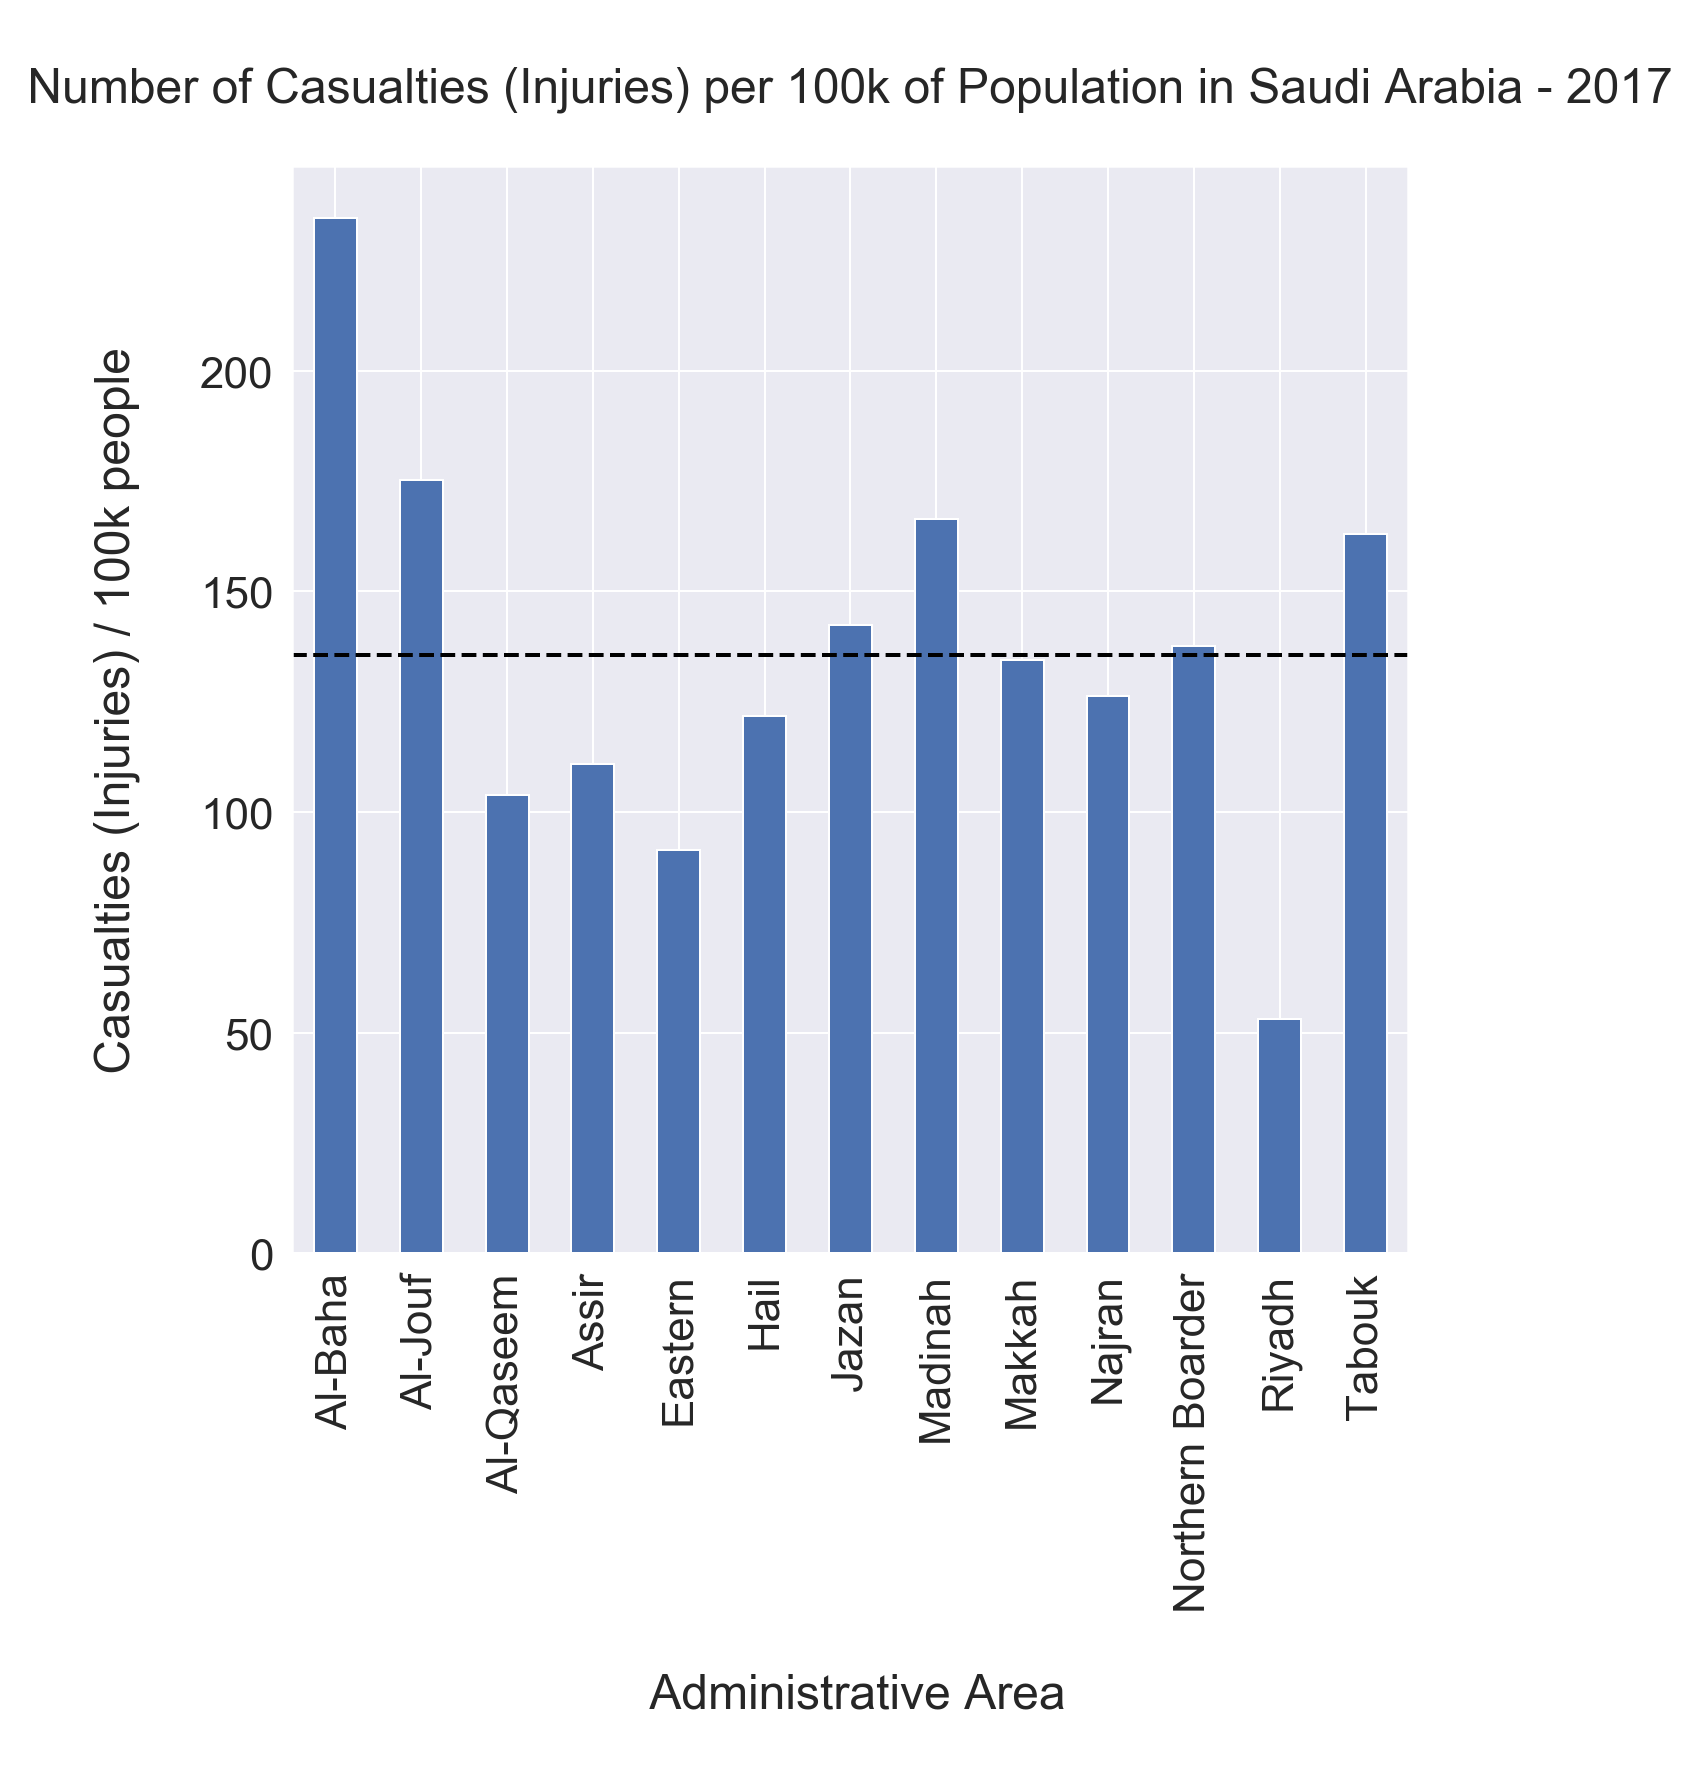

In [79]:
# Ploting number of casualties (injuries) issued per 100k of population by administrative area 

f, ax = plt.subplots(figsize=(10, 10))
number_of_casu_injured_per_100k_pop_2017.plot(kind='bar',ax=ax)
sns.set(font_scale=2,)
ax.set_title('\n Number of Casualties (Injuries) per 100k of Population in Saudi Arabia - 2017 \n')
plt.xlabel('\n Administrative Area\n')
plt.ylabel('\n Casualties (Injuries) / 100k people \n')
ax.axhline(number_of_casu_injured_per_100k_pop_2017.mean(), color='black', linewidth=2,linestyle='dashed') #average line
plt.savefig("../output_charts/Number of Casualties (Injuries) per 100k of Population in Saudi Arabia - 2017.png",bbox_inches='tight')



plt.show()



## " Al-Baha is way higher than the average while Riyadh is moderately low in terms of injuries per 100k people, while average is 136 injuries per 100k people ." 

C:\Users\2020\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\2020\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\2020\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


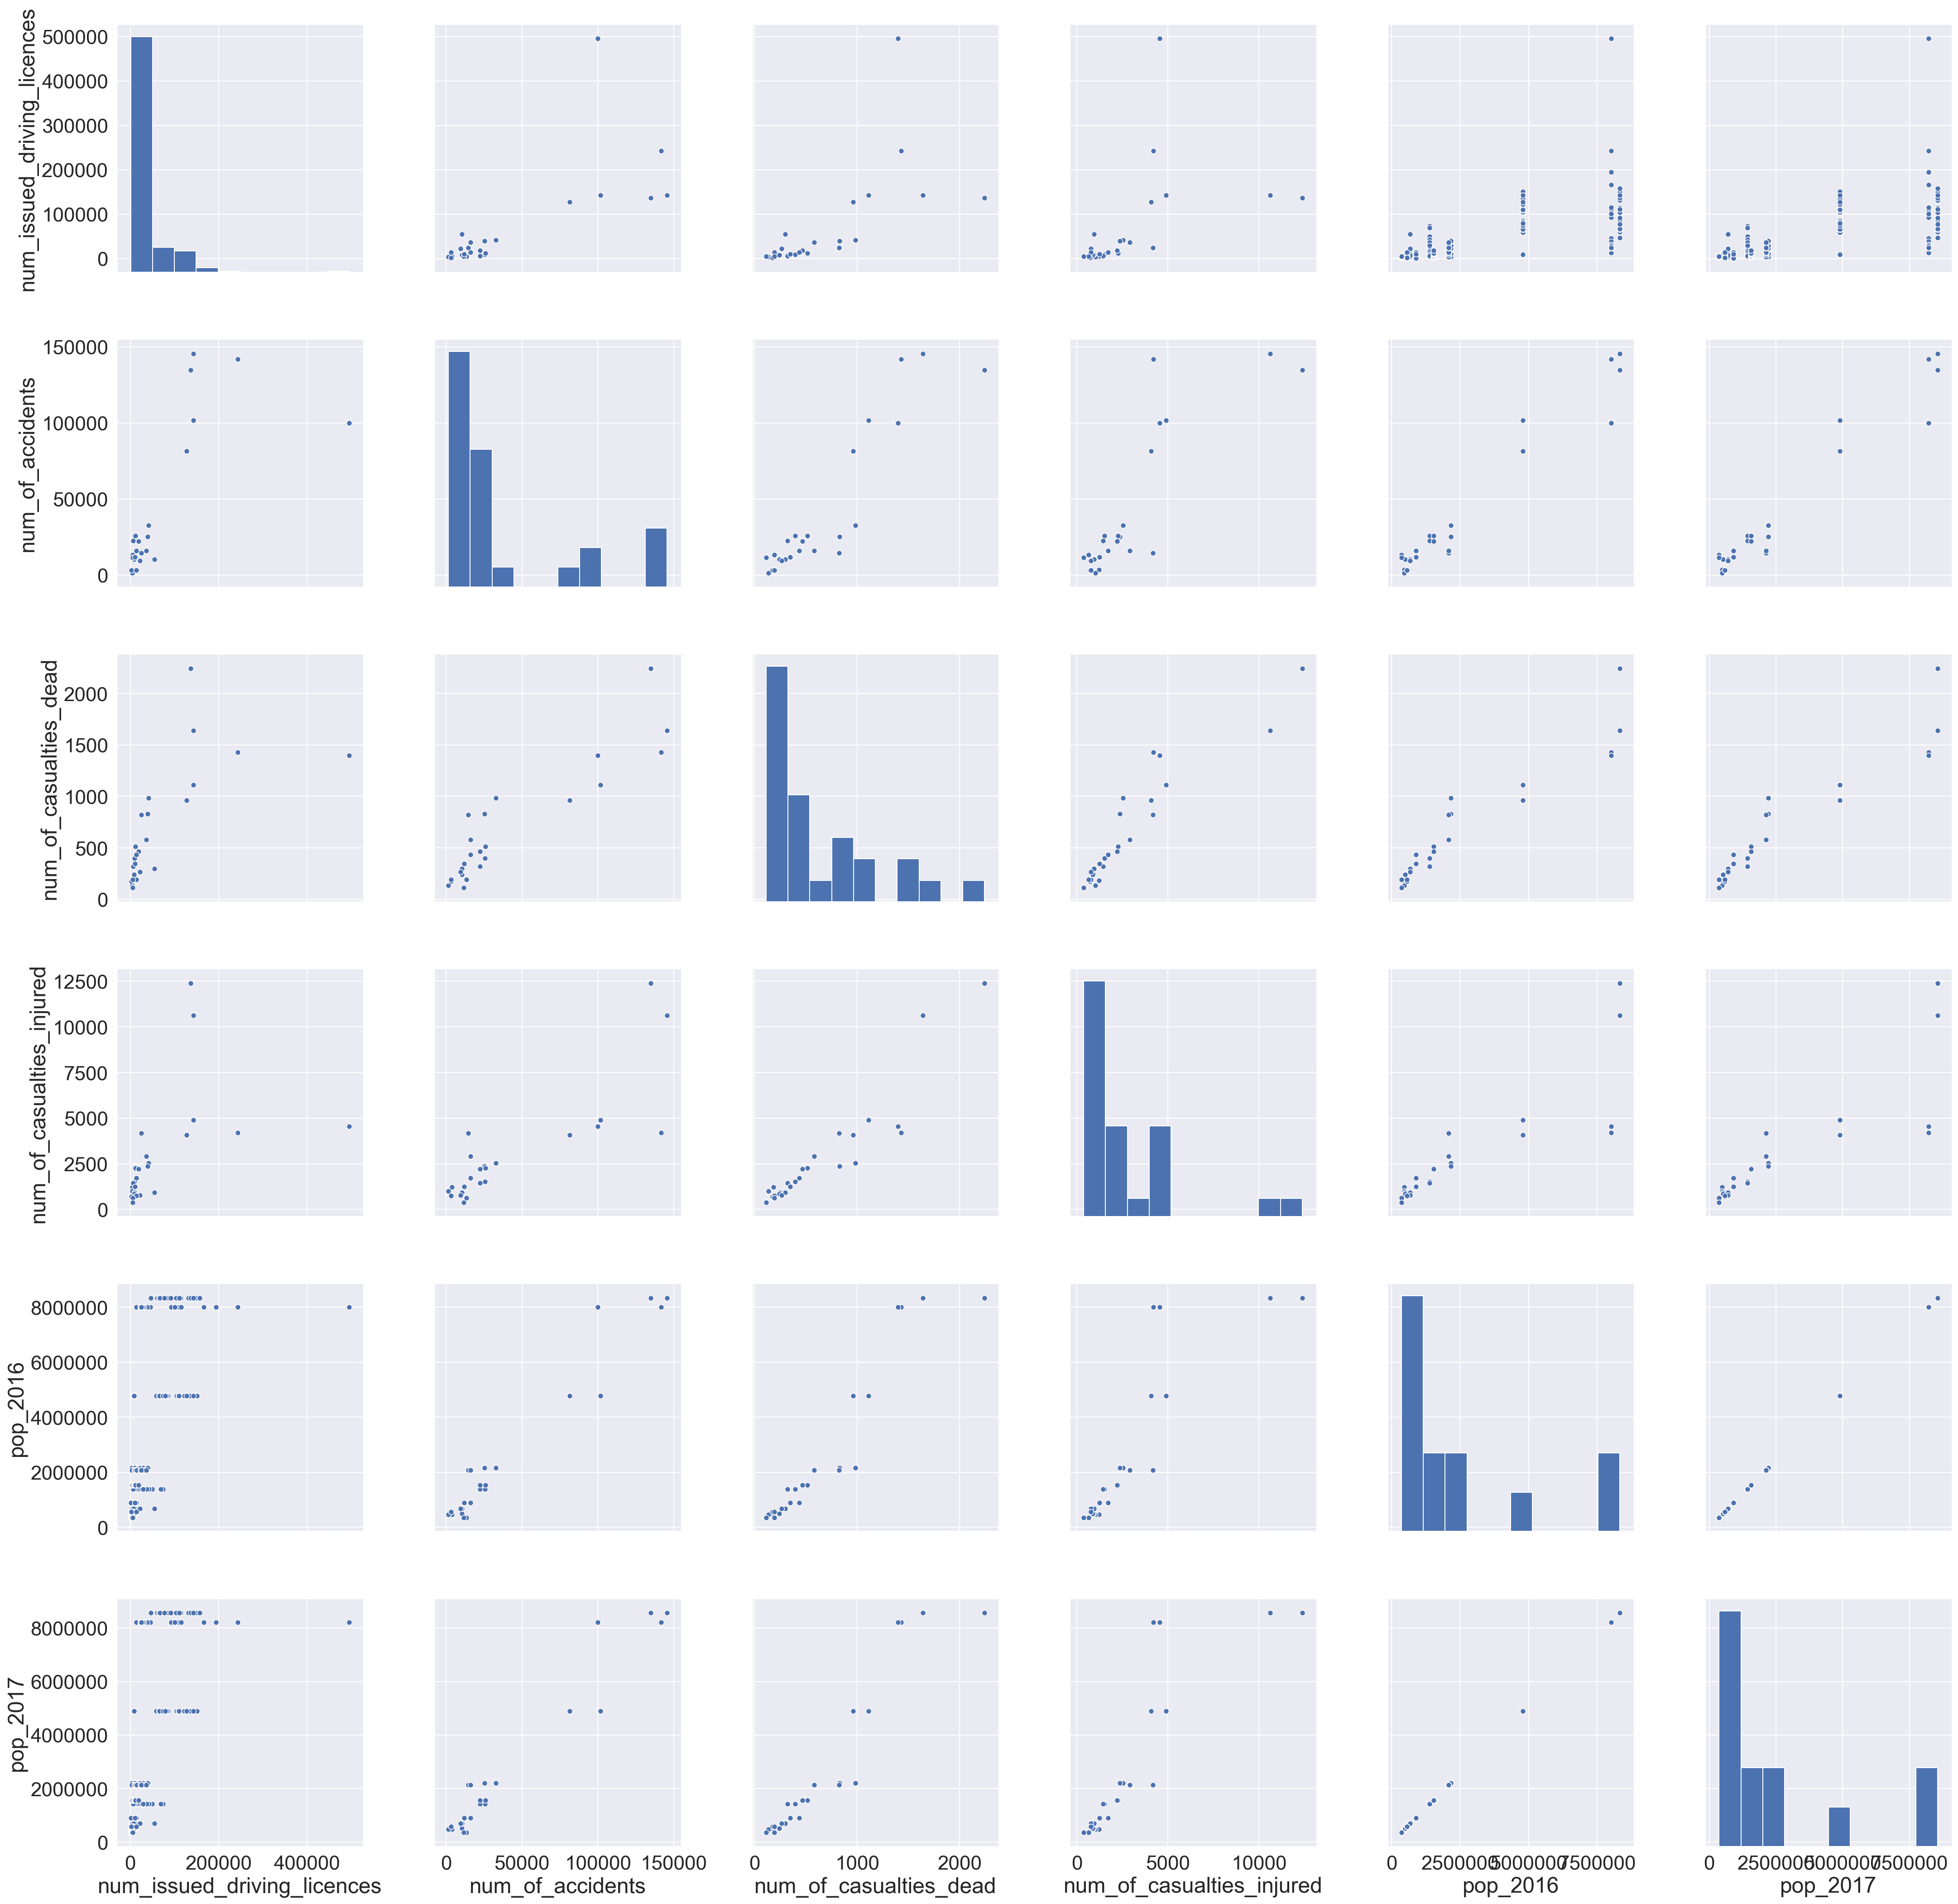

In [80]:
# plotting all variables relationsships and distributions

sns.pairplot(combined_all,size=5)
sns.set(font_scale=1.85)
plt.savefig("../output_charts/plotting all variables relationsships and distributions.png",bbox_inches='tight')


plt.show()

## " These plots show how histograms are skewed due to population distribution, this is why I had to normalize to get some insights from data. "

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

I see a trend in high rates of death in the northern areas of Saudi Arabia while Al-Baha standout with the highest injuries rate among all areas. Riyadh area show moderately low rates in terms of deaths and injuries, I suspect it is due to traffic jams where accidents are minor in severity due to low speed.

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:

The data I analyzed is not a sample of a population since data represent the records of accidents, casualties and driving licences issuance in all areas of Saudi Arabia. So, I think dispite the skewness due to population distribution, this the best we can get.

Does This Assumption Hold for:
    - Driving Licenses
    - Traffic Accidents
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

-Do driving licences have a relation with traffic accidents and casualities?

After normalizing for population, there is a weak relation between driving livences issuance and traffic accidents. It appears first that the relation is highly correlated (positive) however when calculating the correlation after normalizing it does not hold up. However, correlation flipped to negative correlation between driving livences issuance and injuries casualities (-0.5 correlation), this might suggest what I suspect about traffic jams when more drivers are on the road.

In [81]:
# Calculating the corrlation after normalizing for population

# driving licences issuance vs traffic accidents
np.corrcoef(number_of_licen_issued_per_10k_pop_2017,number_of_acced_per_10k_pop_2017)

array([[1.        , 0.02582455],
       [0.02582455, 1.        ]])

In [82]:
# driving licences issuance vs casualties (deaths)
np.corrcoef(number_of_licen_issued_per_10k_pop_2017,number_of_casu_dead_per_100k_pop_2017)

array([[ 1.        , -0.14035323],
       [-0.14035323,  1.        ]])

In [83]:
# driving licences issuance vs casualties (injuries)
np.corrcoef(number_of_licen_issued_per_10k_pop_2017,number_of_casu_injured_per_100k_pop_2017)

array([[ 1.        , -0.50957052],
       [-0.50957052,  1.        ]])


-What are reigons accident per licence? and are there any commonalities?



In [84]:
# traffic accident per driving licences issuance 

number_of_accid_per_licen_issued_2017 = (combined_all_2016_7_only.groupby(['administrative_area'])['num_of_accidents'].mean()/combined_all_2016_7_only.groupby(['administrative_area'])['num_issued_driving_licences'].mean())


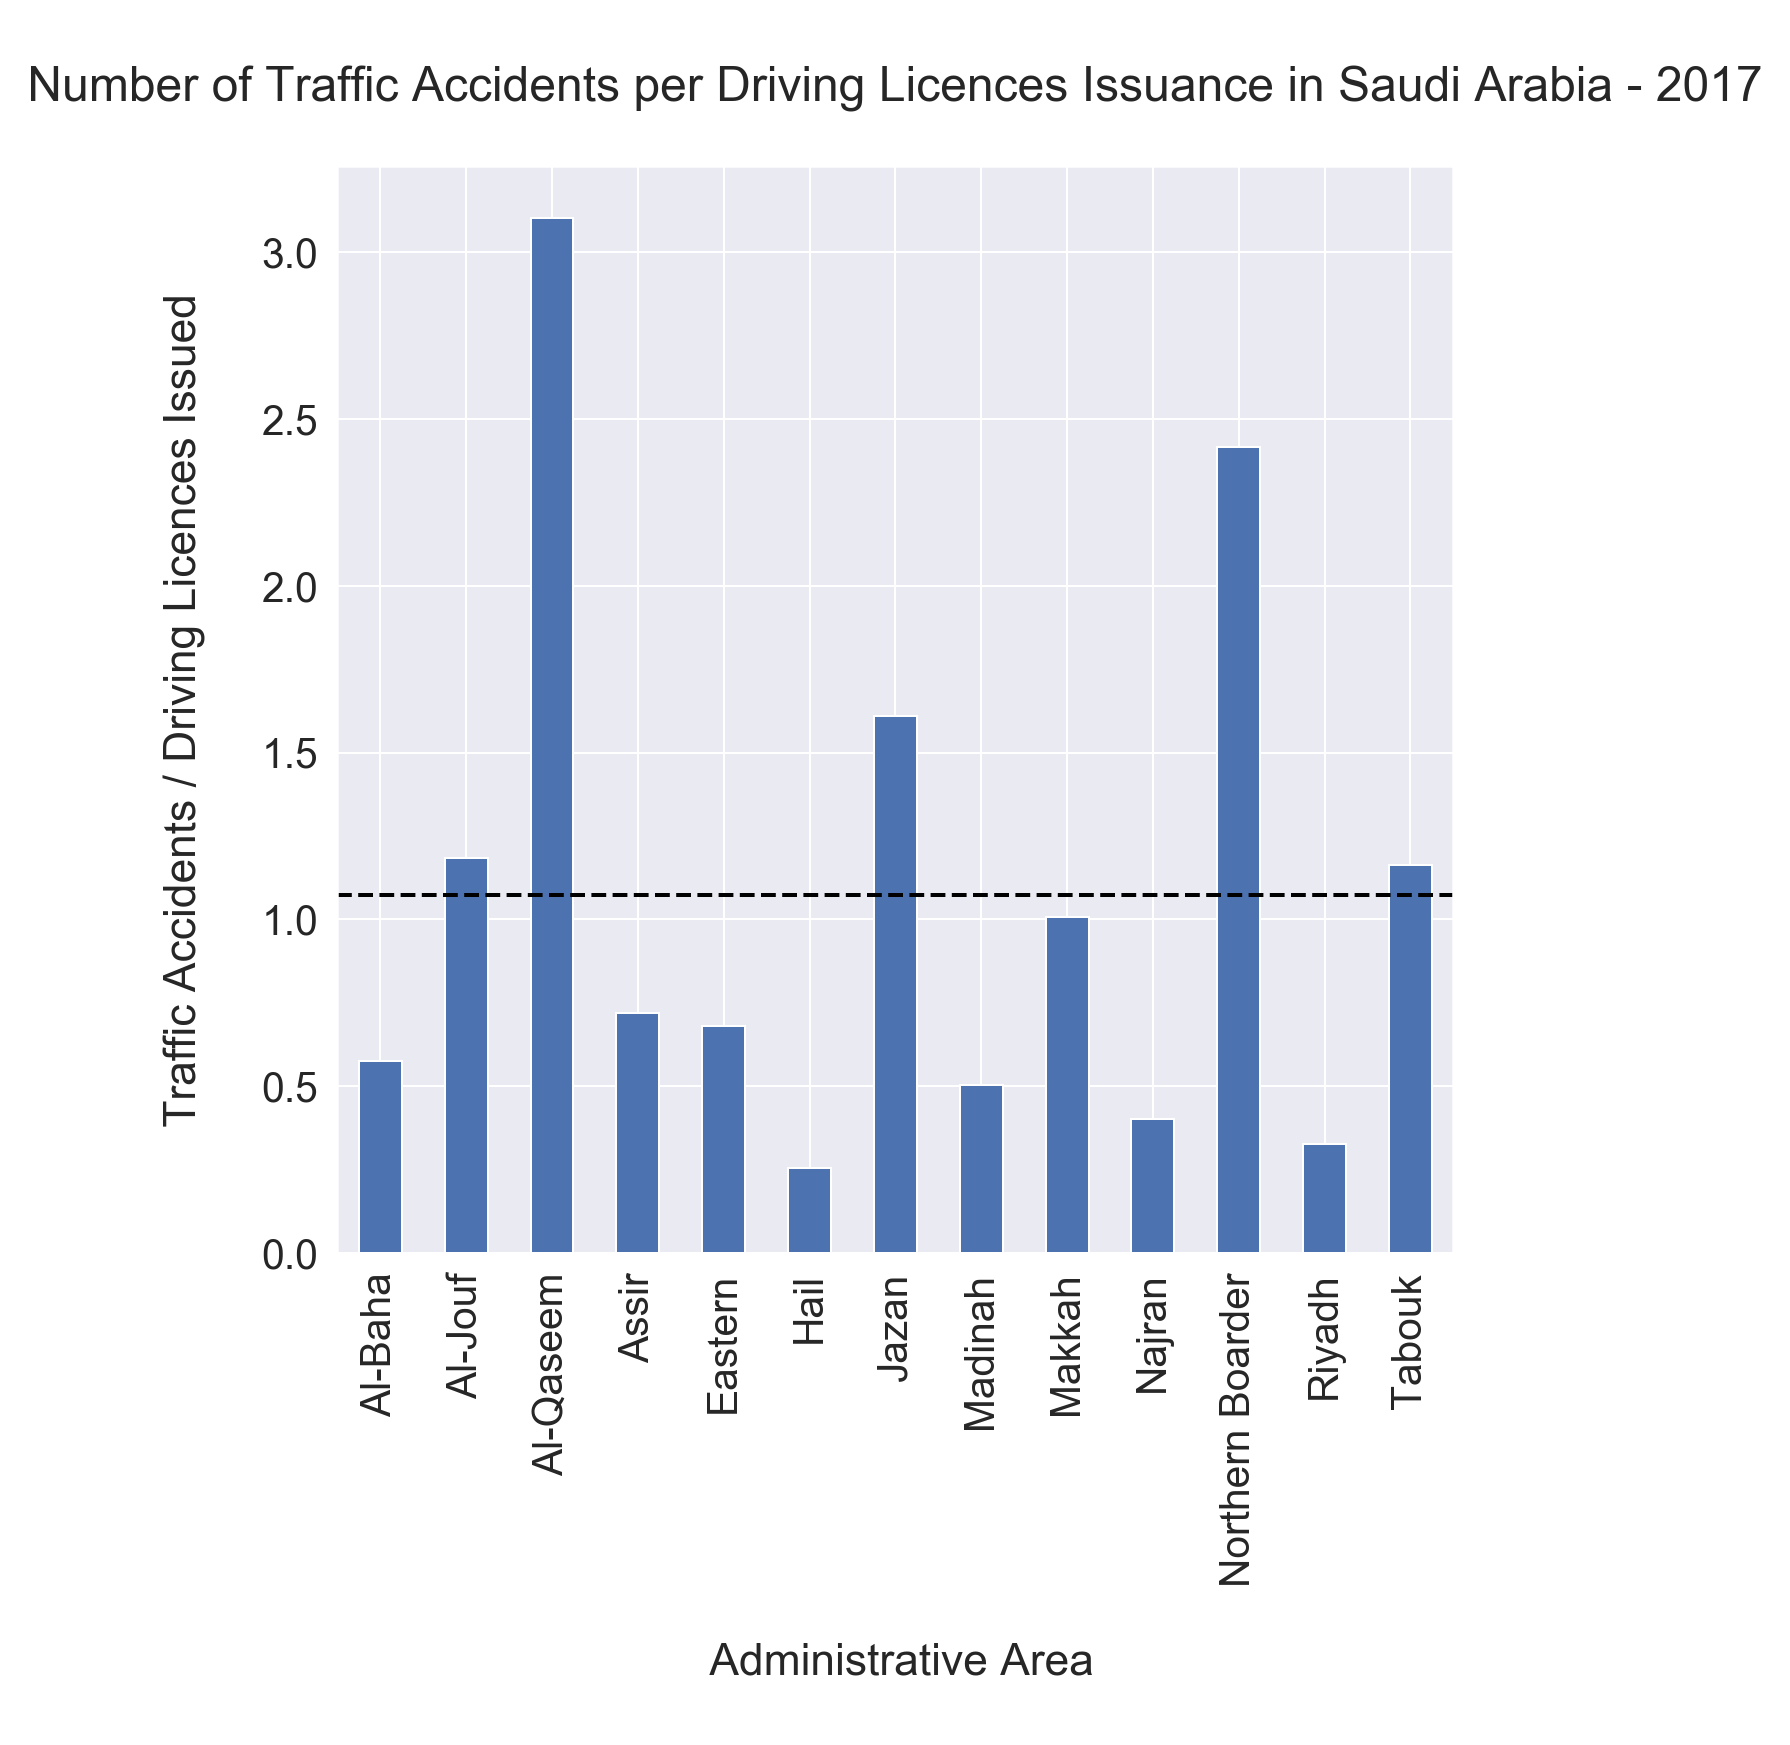

In [85]:
# Ploting number of traffic accidents per driving licences issuance by administrative area 

f, ax = plt.subplots(figsize=(10, 10))
number_of_accid_per_licen_issued_2017.plot(kind='bar',ax=ax)
sns.set(font_scale=2,)
ax.set_title('\n Number of Traffic Accidents per Driving Licences Issuance in Saudi Arabia - 2017 \n')
plt.xlabel('\n Administrative Area\n')
plt.ylabel('\n Traffic Accidents / Driving Licences Issued \n')
ax.axhline(number_of_accid_per_licen_issued_2017.mean(), color='black', linewidth=2,linestyle='dashed') #average line
plt.savefig("../output_charts/Number of Traffic Accidents per Driving Licences Issuance in Saudi Arabia - 2017.png",bbox_inches='tight')



plt.show()


### " Al-Qaseem are is having 3 accidents per issuance of driving licences on average, this could be due to that Al-Qaseem is among the lowest area issuing driving licences in 2017. Northern Boarder area is present again as upnormal. 8 out of 13 areas on average, have less than 1 accident per issuance of driving licences."

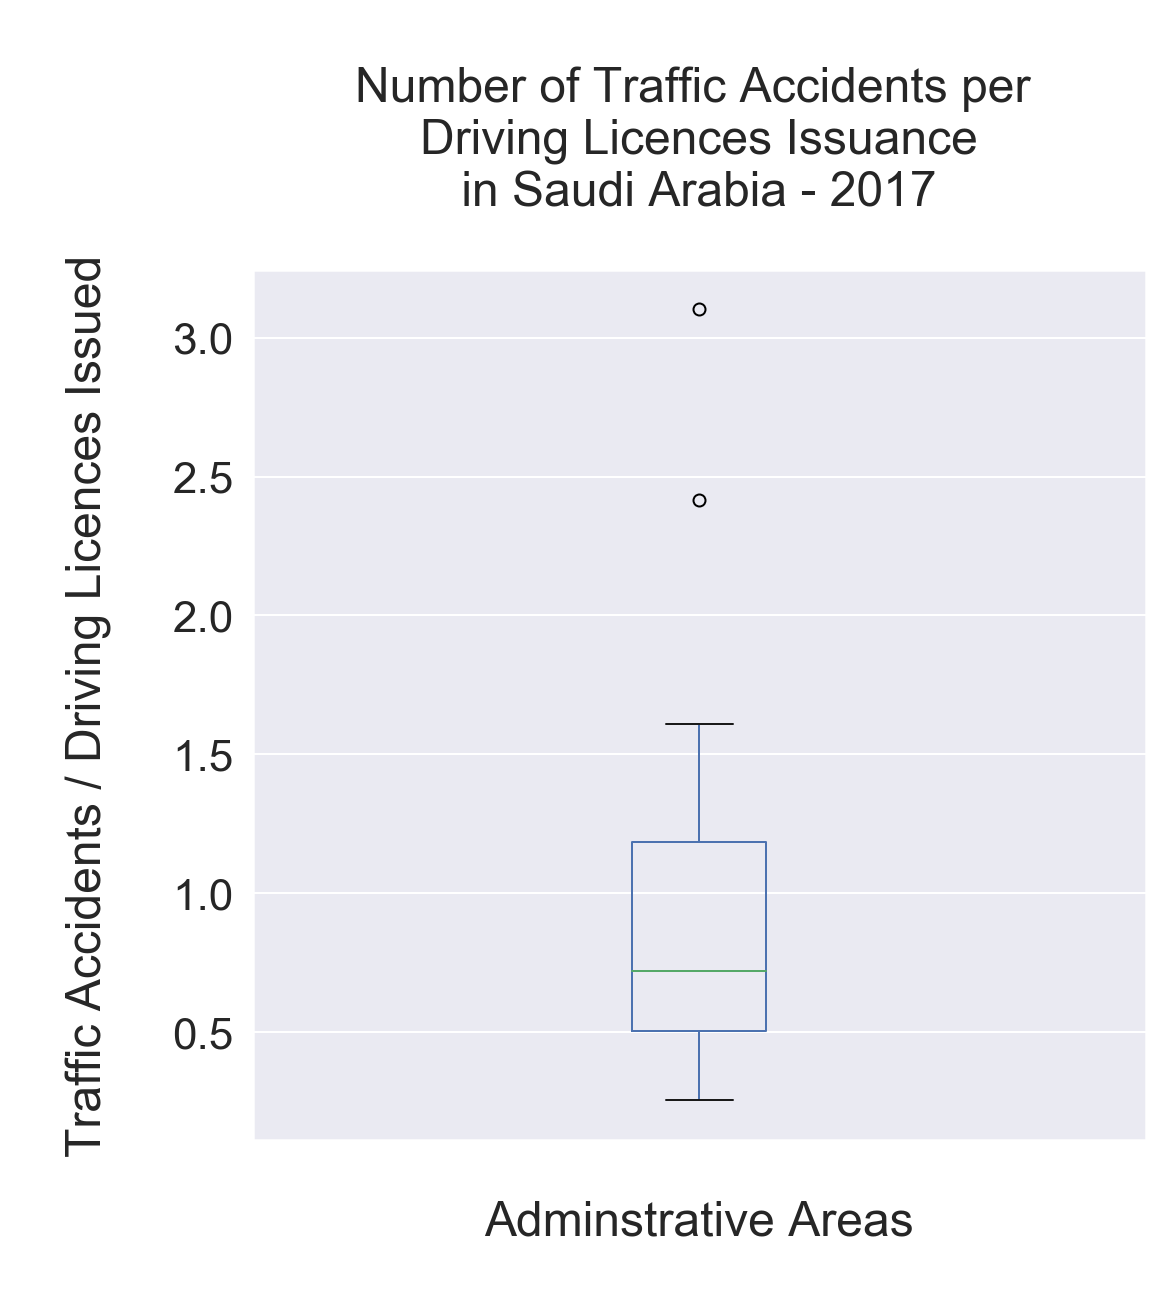

In [86]:
# Ploting number of traffic accidents per driving licences issuance Central Tendency and Spread 

f, ax = plt.subplots(figsize=(8, 8))
number_of_accid_per_licen_issued_2017.plot(kind='box',ax=ax)
sns.set(font_scale=2)
ax.set_title('\nNumber of Traffic Accidents per \nDriving Licences Issuance\n in Saudi Arabia - 2017 \n')
plt.xlabel('\nAdminstrative Areas\n')
plt.ylabel('\nTraffic Accidents / Driving Licences Issued\n')
plt.xticks(ticks=[])
plt.savefig("../output_charts/Number of Traffic Accidents  per Driving Licences Issuance  in Saudi Arabia - 2017.png",bbox_inches='tight')
plt.show()

### " 2 outliers as discussed above. "

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

## Outside Research

Based upon your observations, choose **three** regions that demonstrate interesting trends in the number of driving licenses and traffic accidents. Spend some time doing outside research on provincial and central policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

Answer:

I would say that the following would be my research questions for each one of these areas which show some trends and standout among others:

    -Northern Boarder: why death rates are the highest?

    -Al-Jouf:    High casualties in general, why?

    -Al-Baha:    Why injuries rates are the highest?

    -Hail:       Are there any reasons for high rates of driving licences issuance?

    -Riyadh:     Are there any reasons for high rates of driving licences issuance? And why casualties is the lowest among 
                 other areas?

## Conclusions and Recommendations

- Based on your exploration of the data, what are you key takeaways and recommendations?
- Are there additional data you desire that would better inform your investigations?

Answer:


I would say, the follwoing data availability will unleash great insights if available and can be linked with what we have:

- Accidents meta-data.
- Demographics of dead and injured.
- 'Saher' systme and traffic violations data.